In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pylab
import statsmodels.api as sm
import xgboost as xgb
import tensorflow as tf
from tabulate import tabulate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import ttest_ind
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, KFold
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_csv("/Users/idaba/OneDrive/Desktop/BANA 698/Data.csv")

In [3]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowstoGDP', 'FDIInflows', 'FDIOutflowsPercent', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'GrossNationalSpending', 'InflationConsumerPrices',
       'InflationRate', 'InflationPercent', 'GoodsNetTrade',
       'GoodsandServicesNetTrade', 'TradePercent', 'ServicesTradedPercent',
       'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth',
       'GovernmentSpending', 'GovernmentEducationSpendingToGDP',
       'GovernmentEducationSpendingToTotalSpending',
       'GovernmentMilitarySpendingToGDP',
       'GovernmentMilitarySpendingToTotalSpending',
       'GovernmentMilitarySpending', 'ElectricityAccess',
       'AgriculturalCarbonDioxide', 'TransportCarbonDioxide',
       'WasteCarbonDioxide', 'ForestArea', 'RenewableEnergyConsumption',
       'TotalGreenhouseGas', 'LongTermExternalDebt', 'TotalPSD', 'LongTermPSD',
       'ShortTermPSD', 'InterestPaymentsPercent', 'ExternalDebt', 'TotalDebt

In [4]:
# rename columns

df.rename(columns={'FDIOutflowsPercent': 'FDIOutflowsToGDP', 'FDIInflowstoGDP': 'FDIInflowsToGDP'}, inplace=True)

In [5]:
# see the shape

df.shape

(651, 59)

In [6]:
# remove unwanted column

df = df.drop(['GrossNationalSpending', 'InflationConsumerPrices',
       'GoodsNetTrade', 'GoodsandServicesNetTrade', 'TradePercent', 'ServicesTradedPercent',
       'ElectricityAccess','AgriculturalCarbonDioxide', 'TransportCarbonDioxide',
       'WasteCarbonDioxide', 'ForestArea', 'RenewableEnergyConsumption',
       'TotalGreenhouseGas', 'LongTermExternalDebt', 'TotalPSD', 'LongTermPSD',
       'ShortTermPSD', 'InterestPaymentsPercent', 'ExternalDebt', 'TotalDebt',
       'FemaleLifeExpectancy', 'MaleLifeExpectancy','AdultLiteracyRate', 
       'YouthLiteracyRate', 'BasicDrinkingWater','SafelyManagedDrinkingWater',
       'BasicHandwashing', 'PovertyRatio', 'NationalPovertyRatio', 'SocialPovertyRatio',
       'UnemploymentwithAdvancedEducation', 'UnemploymentwithBasicEducation',
       'UnemploymentWithintermediateEducation', 'TotalUnemployment',
       'YouthUnemployment','TotalLifeExpectancy', 'ExchangeRate'], axis =1)

In [7]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'InflationRate', 'InflationPercent',
       'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth',
       'GovernmentSpending', 'GovernmentEducationSpendingToGDP',
       'GovernmentEducationSpendingToTotalSpending',
       'GovernmentMilitarySpendingToGDP',
       'GovernmentMilitarySpendingToTotalSpending',
       'GovernmentMilitarySpending'],
      dtype='object')

In [8]:
# see the shape

df.shape

(651, 22)

In [9]:
# see statistics 

df.describe().round()

,Year,FDINet,FDIInflowsToGDP,FDIInflows,FDIOutflowsToGDP,FDIOutflows,GDP,GDPGrowth,InflationRate,InflationPercent,GovernmentSpendingToGDP,GovernmentSpendingAnnualGrowth,GovernmentSpending,GovernmentEducationSpendingToGDP,GovernmentEducationSpendingToTotalSpending,GovernmentMilitarySpendingToGDP,GovernmentMilitarySpendingToTotalSpending,GovernmentMilitarySpending
count,651.0,5.080000e+02,540.0,5.510000e+02,500.0,5.110000e+02,6.090000e+02,610.0,608.0,608.0,490.0,468.0,4.880000e+02,366.0,349.0,448.0,444.0,4.510000e+02
mean,2022.0,1.831873e+09,4.0,9.259408e+09,2.0,1.120022e+10,4.955280e+11,4.0,13.0,13.0,16.0,3.0,2.163479e+10,4.0,12.0,2.0,6.0,3.991834e+09
std,1.0,2.839158e+10,29.0,4.560999e+10,27.0,4.888731e+10,2.271615e+12,6.0,46.0,46.0,9.0,10.0,8.728420e+10,2.0,6.0,2.0,6.0,1.781298e+10
min,2021.0,-1.650000e+11,-360.0,-3.090000e+11,-360.0,-3.320000e+11,5.906598e+07,-29.0,-21.0,-21.0,1.0,-76.0,4.400000e+01,0.0,1.0,0.0,0.0,7.920000e+02
25%,2021.0,-2.442444e+09,1.0,7.749717e+07,0.0,1.689923e+06,8.342244e+09,2.0,3.0,3.0,11.0,0.0,1.184661e+08,3.0,9.0,1.0,3.0,1.671916e+07
50%,2022.0,-5.379498e+08,2.0,8.004435e+08,0.0,8.737283e+07,3.388693e+10,4.0,6.0,6.0,16.0,2.0,8.590246e+08,4.0,13.0,2.0,5.0,1.715874e+08
75%,2023.0,-2.142594e+07,5.0,5.555248e+09,1.0,2.395132e+09,2.460000e+11,6.0,10.0,10.0,20.0,5.0,6.146192e+09,5.0,16.0,2.0,8.0,8.478140e+08
max,2023.0,1.780000e+11,434.0,4.760000e+11,349.0,4.540000e+11,2.770000e+13,75.0,922.0,922.0,62.0,142.0,9.424600e+11,14.0,33.0,37.0,58.0,2.964390e+11


In [10]:
# look for null values

df.isna().sum()

CountryID                                       0
Year                                            0
CountryName                                     0
Region                                          0
IncomeLevel                                     3
FDINet                                        143
FDIInflowsToGDP                               111
FDIInflows                                    100
FDIOutflowsToGDP                              151
FDIOutflows                                   140
GDP                                            42
GDPGrowth                                      41
InflationRate                                  43
InflationPercent                               43
GovernmentSpendingToGDP                       161
GovernmentSpendingAnnualGrowth                183
GovernmentSpending                            163
GovernmentEducationSpendingToGDP              285
GovernmentEducationSpendingToTotalSpending    302
GovernmentMilitarySpendingToGDP               203


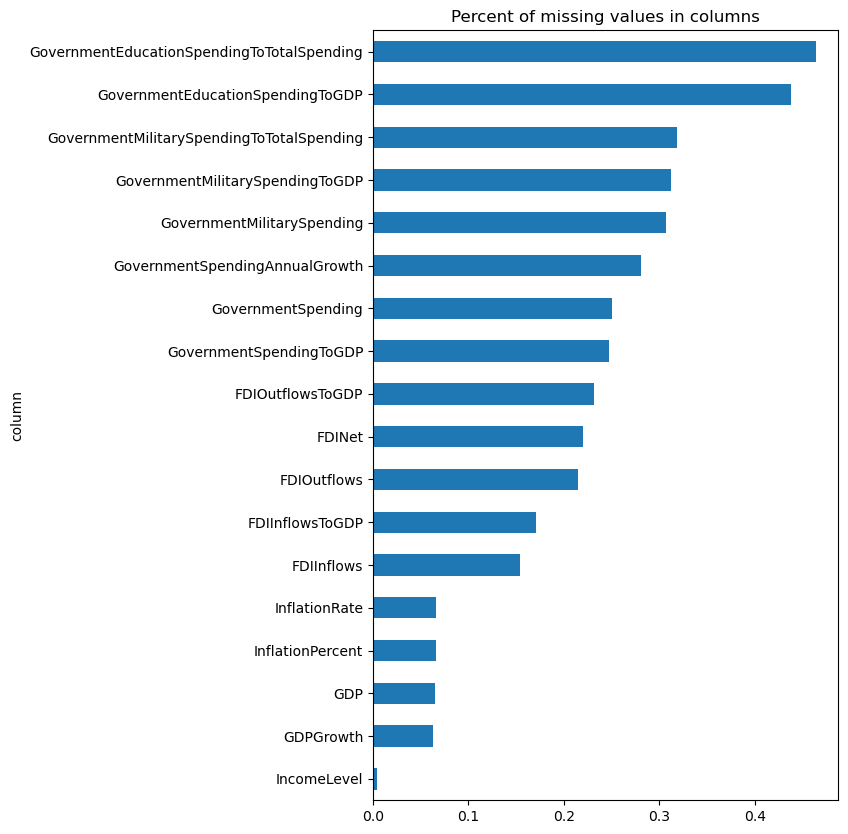

In [11]:
# visualize null values

def plot_missing_values(df):
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (6, 10)
    missing_df.plot(kind='barh', x='column', y='percent_missing', legend=False)  # Set legend to False
    plt.title('Percent of missing values in columns')
plot_missing_values(df)


In [12]:
# see the data type for each field

df.dtypes

CountryID                                      object
Year                                            int64
CountryName                                    object
Region                                         object
IncomeLevel                                    object
FDINet                                        float64
FDIInflowsToGDP                               float64
FDIInflows                                    float64
FDIOutflowsToGDP                              float64
FDIOutflows                                   float64
GDP                                           float64
GDPGrowth                                     float64
InflationRate                                 float64
InflationPercent                              float64
GovernmentSpendingToGDP                       float64
GovernmentSpendingAnnualGrowth                float64
GovernmentSpending                            float64
GovernmentEducationSpendingToGDP              float64
GovernmentEducationSpendingT

In [13]:
# Edit income levels labels

label_mapping = {
    'Low income': 'Low Income',
    'Lower middle income': 'Lower Middle Income',
    'Upper middle income': 'Upper Middle Income',
    'High income': 'High Income'
}

***<font color="red">Which countries have elevated income levels?</font>***

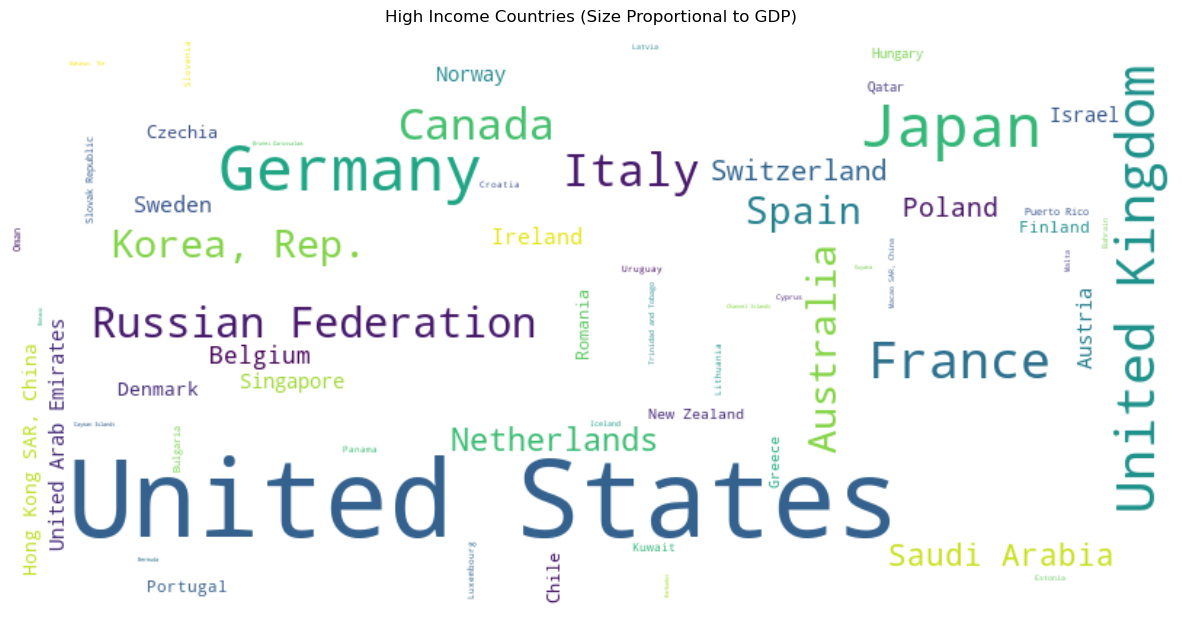


High income countries in 2023:
           American Samoa
                  Andorra
      Antigua and Barbuda
                    Aruba
                Australia
                  Austria
             Bahamas, The
                  Bahrain
                 Barbados
                  Belgium
                  Bermuda
   British Virgin Islands
        Brunei Darussalam
                 Bulgaria
                   Canada
           Cayman Islands
          Channel Islands
                    Chile
                  Croatia
                  Cura?ao
                   Cyprus
                  Czechia
                  Denmark
                  Estonia
            Faroe Islands
                  Finland
                   France
         French Polynesia
                  Germany
                Gibraltar
                   Greece
                Greenland
                     Guam
                   Guyana
     Hong Kong SAR, China
                  Hungary
                  Iceland
      

In [ ]:
# get a list of high income coutries in 2023 

high_income_df = df[(df['Year'] == 2023) & (df['IncomeLevel'] == 'High income')][['CountryName', 'GDP']]
high_income_df = high_income_df.sort_values('CountryName')

word_freq = high_income_df.set_index('CountryName')['GDP'].to_dict()

wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     prefer_horizontal=0.7)
word_freq_clean = {k: v for k, v in word_freq.items() if pd.notna(v)}

wordcloud.generate_from_frequencies(word_freq_clean)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('High Income Countries (Size Proportional to GDP)')
plt.show()

print("\nHigh income countries in 2023:")
print(high_income_df['CountryName'].to_string(index=False))

In [15]:
# Show the levels of income on the world map and list high income countries

df_latest = df[df['Year'] == 2023].copy()

fig = px.choropleth(df_latest, 
                    locations="CountryID",
                    color="IncomeLevel",
                    hover_name="CountryName",
                    color_discrete_map={
                        'Upper Middle Income': '#4682B4',
                        'Low Income': '#ADD8E6',
                        'High Income': '#00008B',
                        'Lower Middle Income': '#87CEEB'
                    },
                    title="World Map of Income Levels (2023)")

fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False,
             showcoastlines=True,
             projection_type='equirectangular'),
    width=1000,
    height=600
)

fig.show()



<font color="red">***Were there any changes in income level distributions between the years 2021 to 2023?***</font>

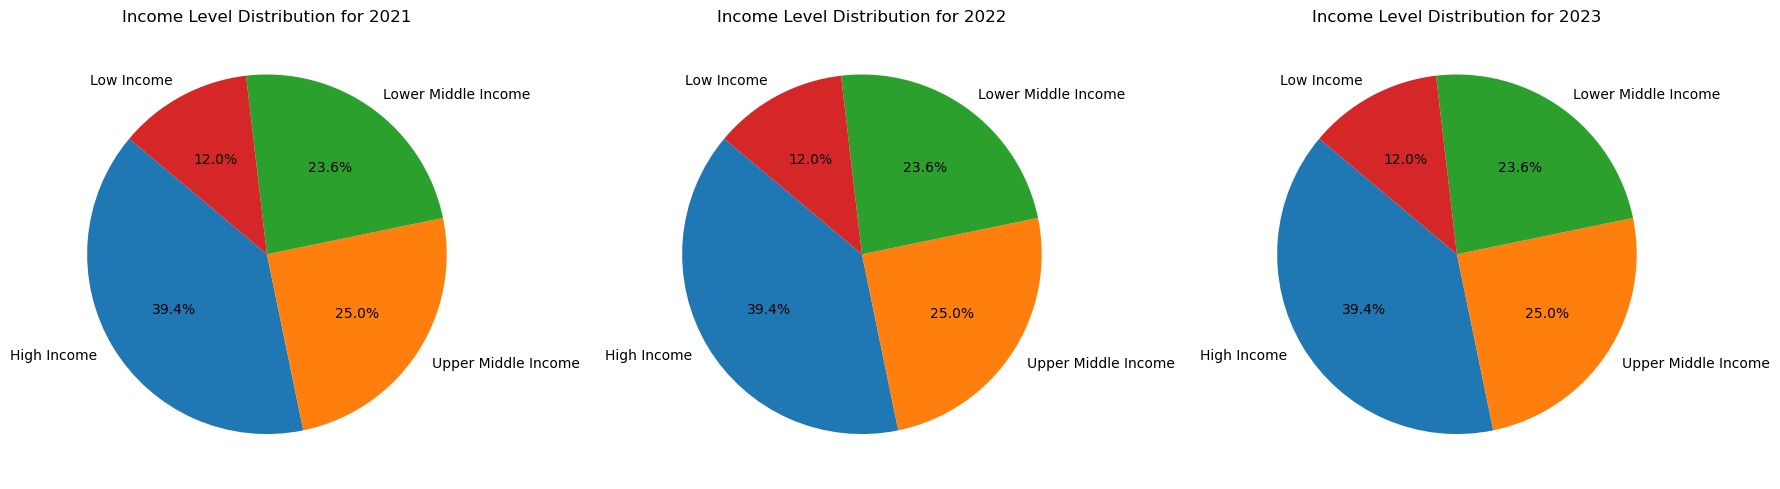

In [16]:
# income level for years 2021, 2022, 2023

df['IncomeLevel'] = df['IncomeLevel'].map(label_mapping)  
df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]

def plot_pie_chart(ax, data, year):
    income_levels = data['IncomeLevel'].value_counts()
    ax.pie(income_levels, labels=income_levels.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Income Level Distribution for {year}')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plot_pie_chart(axs[0], df21, 2021)
plot_pie_chart(axs[1], df22, 2022)
plot_pie_chart(axs[2], df23, 2023)
plt.tight_layout()
plt.show()


***<font color="red">Were there any changes in GDP distribution between the years 2021 to 2023?</font>***

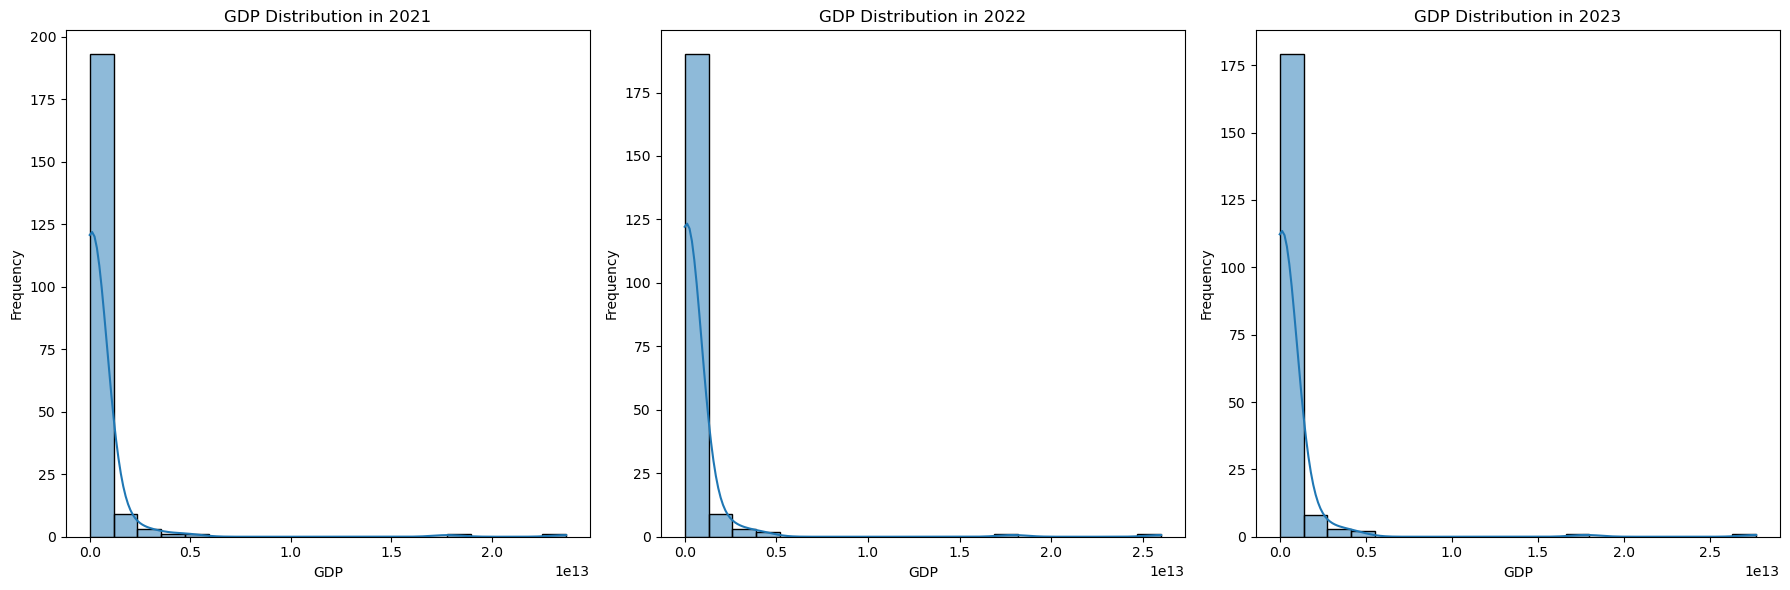

In [17]:
# GDP distribution for the years 2021, 2022, and 2023

df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df21['GDP'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('GDP Distribution in 2021')
axs[0].set_xlabel('GDP')
axs[0].set_ylabel('Frequency')

sns.histplot(df22['GDP'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('GDP Distribution in 2022')
axs[1].set_xlabel('GDP')
axs[1].set_ylabel('Frequency')

sns.histplot(df23['GDP'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('GDP Distribution in 2023')
axs[2].set_xlabel('GDP')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

***<font color="red">How does GDP growth differ for various income levels?</font>***

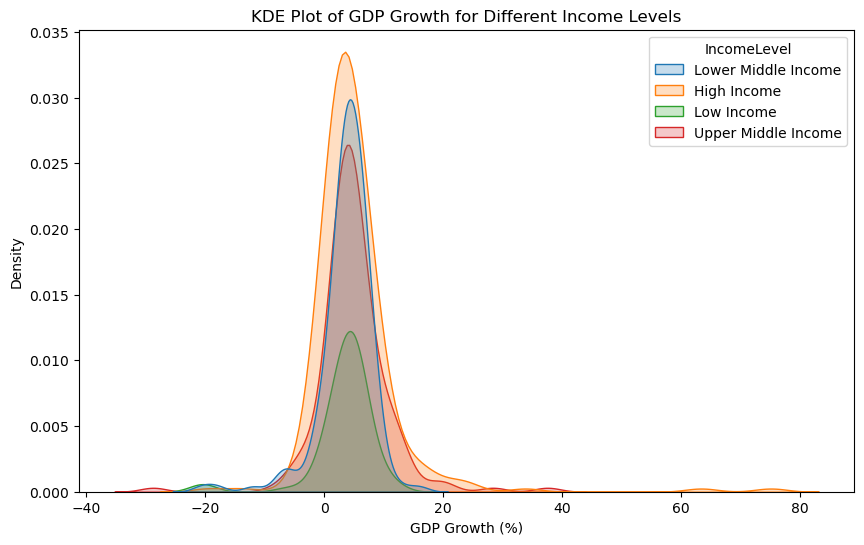

In [18]:
# GDP growth for different income levels

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='GDPGrowth', hue='IncomeLevel', fill=True)
plt.title('KDE Plot of GDP Growth for Different Income Levels')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Density')
plt.show()

***<font color="red">How has GDP changed from 2021 to 2023 in the top 20 countries with the highest GDP?</font>***

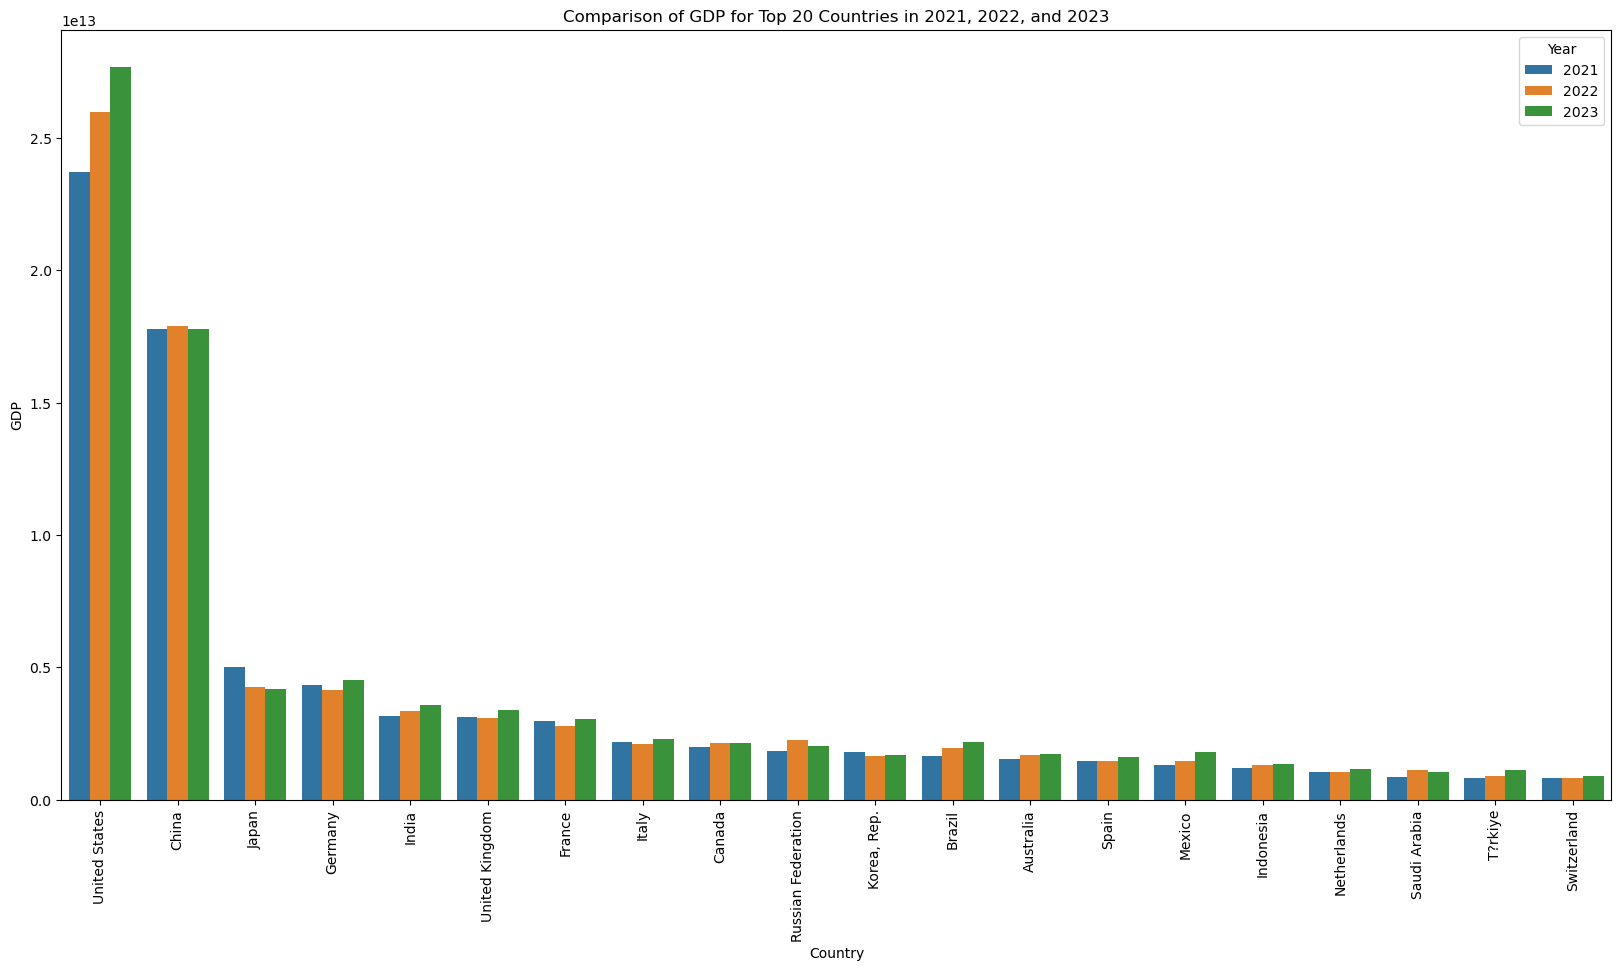

In [19]:
# change of GDP for top 20 countries from 2021 to 2023

df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]
top20_gdp_2021 = df21.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2022 = df22.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2023 = df23.sort_values(by='GDP', ascending=False).head(20)
top20_gdp_2021['Year'] = 2021
top20_gdp_2022['Year'] = 2022
top20_gdp_2023['Year'] = 2023
combined_gdp = pd.concat([top20_gdp_2021, top20_gdp_2022, top20_gdp_2023])
plt.figure(figsize=(20, 10))
sns.barplot(x='CountryName', y='GDP', hue='Year', data=combined_gdp)
plt.xticks(rotation=90)
plt.title('Comparison of GDP for Top 20 Countries in 2021, 2022, and 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.legend(title='Year')
plt.show()

***<font color="red">Have there been differences in the inflation rate for countries with different income levels within the years 2021 to 2023?</font>***

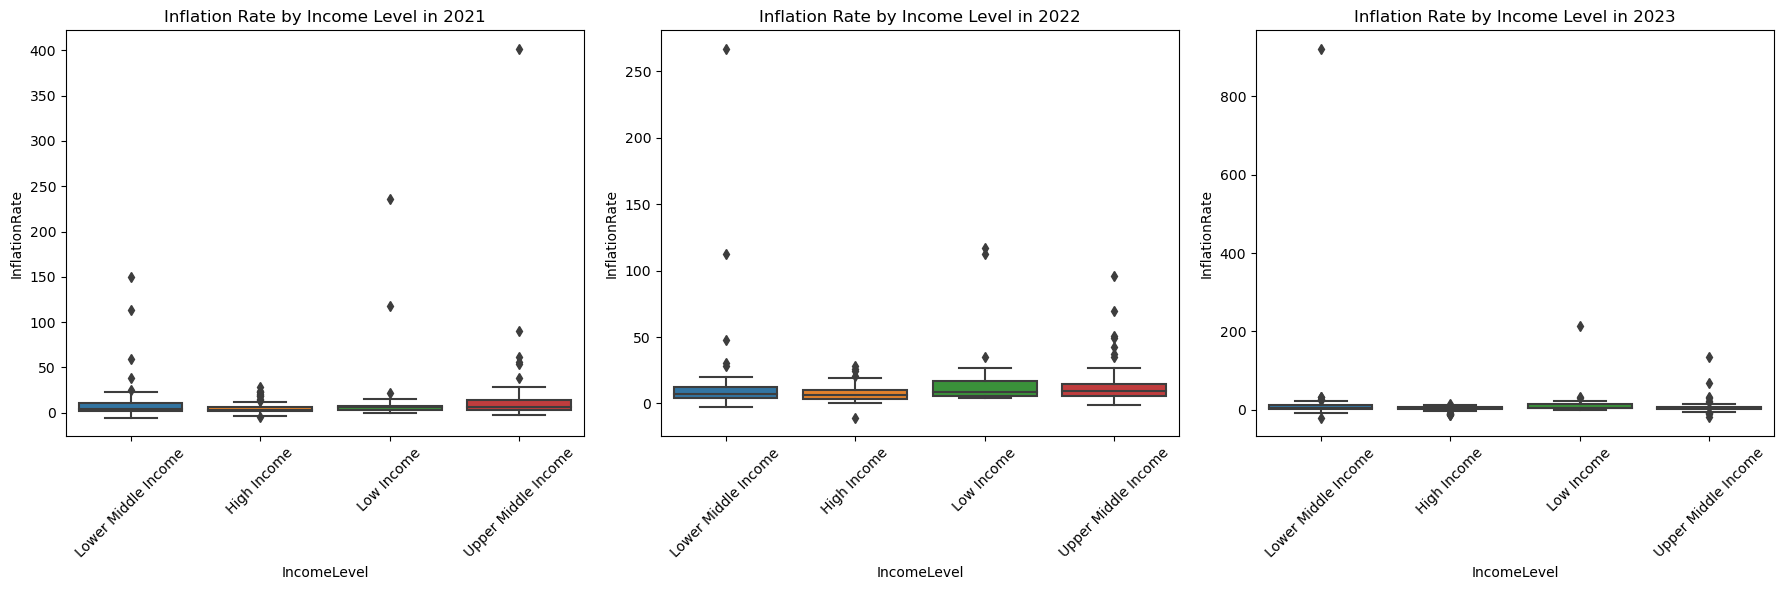

In [20]:
# inflation rate for different income levels

df21 = df[df['Year'] == 2021]
df22 = df[df['Year'] == 2022]
df23 = df[df['Year'] == 2023]

combined_df = pd.concat([df21, df22, df23])

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df21, x='IncomeLevel', y='InflationRate')
plt.title('Inflation Rate by Income Level in 2021')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(data=df22, x='IncomeLevel', y='InflationRate')
plt.title('Inflation Rate by Income Level in 2022')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df23, x='IncomeLevel', y='InflationRate')
plt.title('Inflation Rate by Income Level in 2023')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

***<font color="red">How has the portion of government military spending, in comparison to total government spending, changed between 2021 to 2023?</font>***

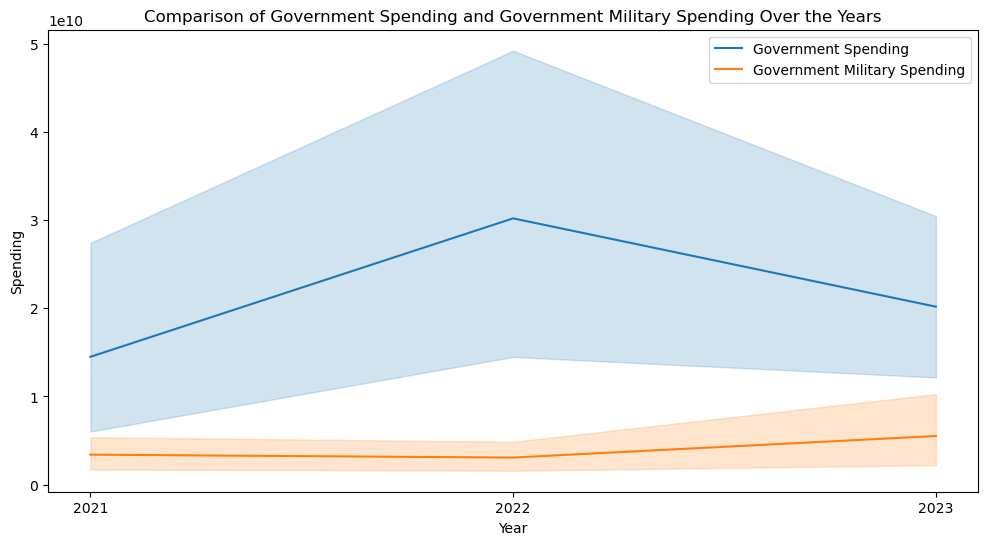

In [21]:
# military spending vs total government spending

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='GovernmentSpending', label='Government Spending')
sns.lineplot(data=df, x='Year', y='GovernmentMilitarySpending', label='Government Military Spending')
plt.title('Comparison of Government Spending and Government Military Spending Over the Years')
plt.xlabel('Year')
plt.ylabel('Spending')
plt.legend()
plt.xticks([2021, 2022, 2023])
plt.show()

***<font color="red">Is there any detectable relationship between foreign investment indicators?</font>***

c:\Users\idaba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



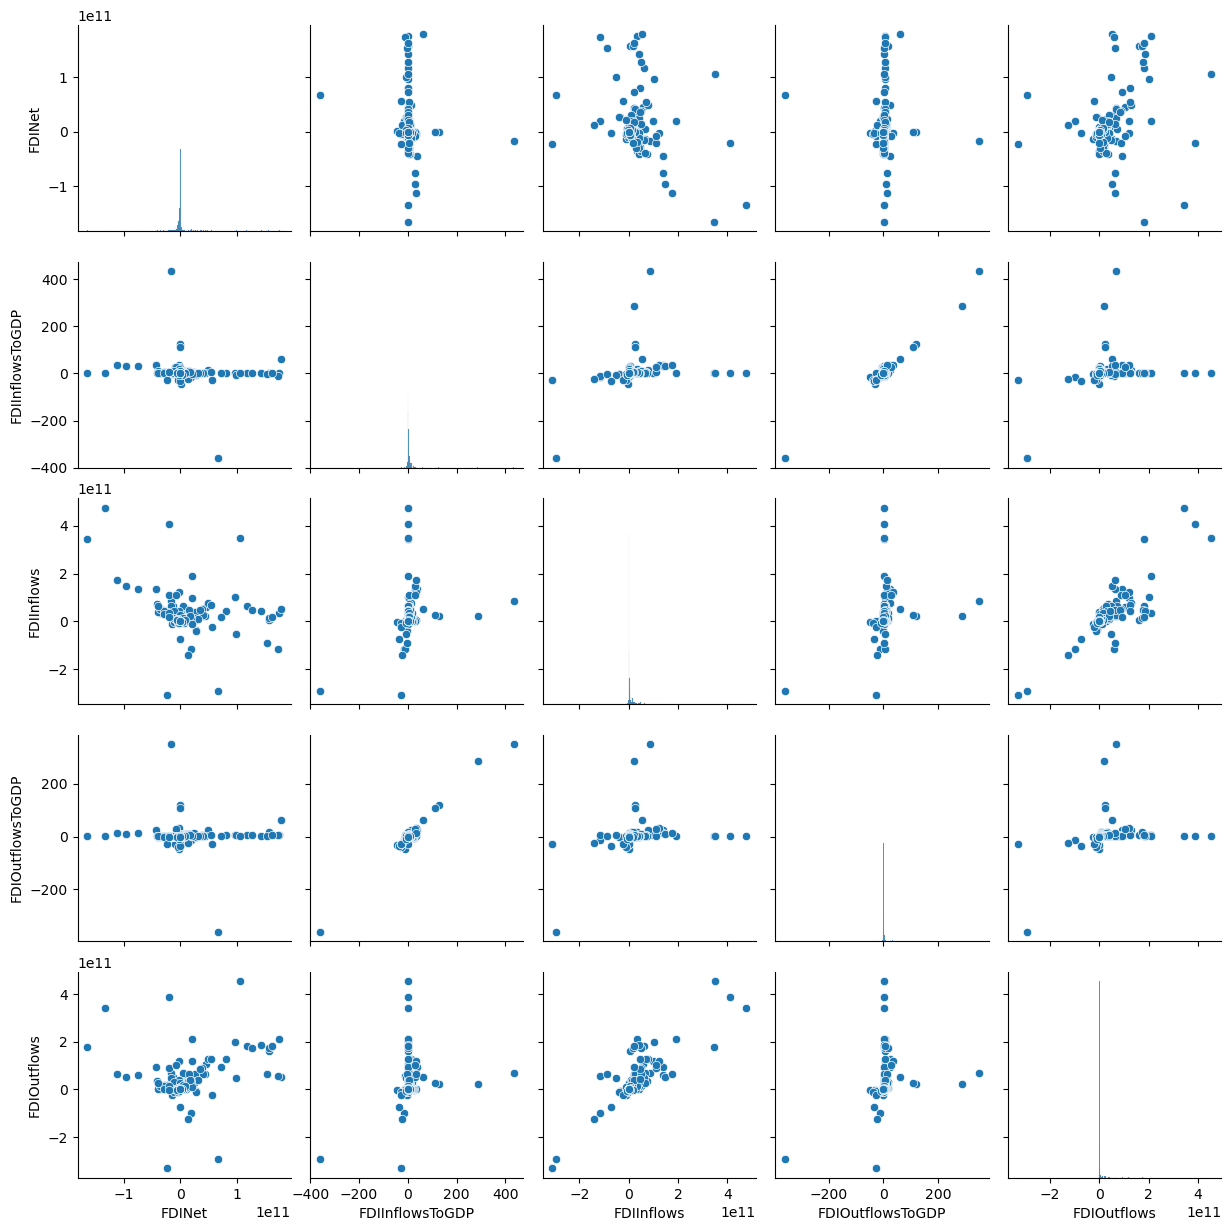

In [22]:
# Foreign Investment

ForienInvestment = df.loc[:,['FDINet','FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows']]

sns.pairplot(data=ForienInvestment)


***<font color="red">Are there correlations between numeric understudy values?</font>***

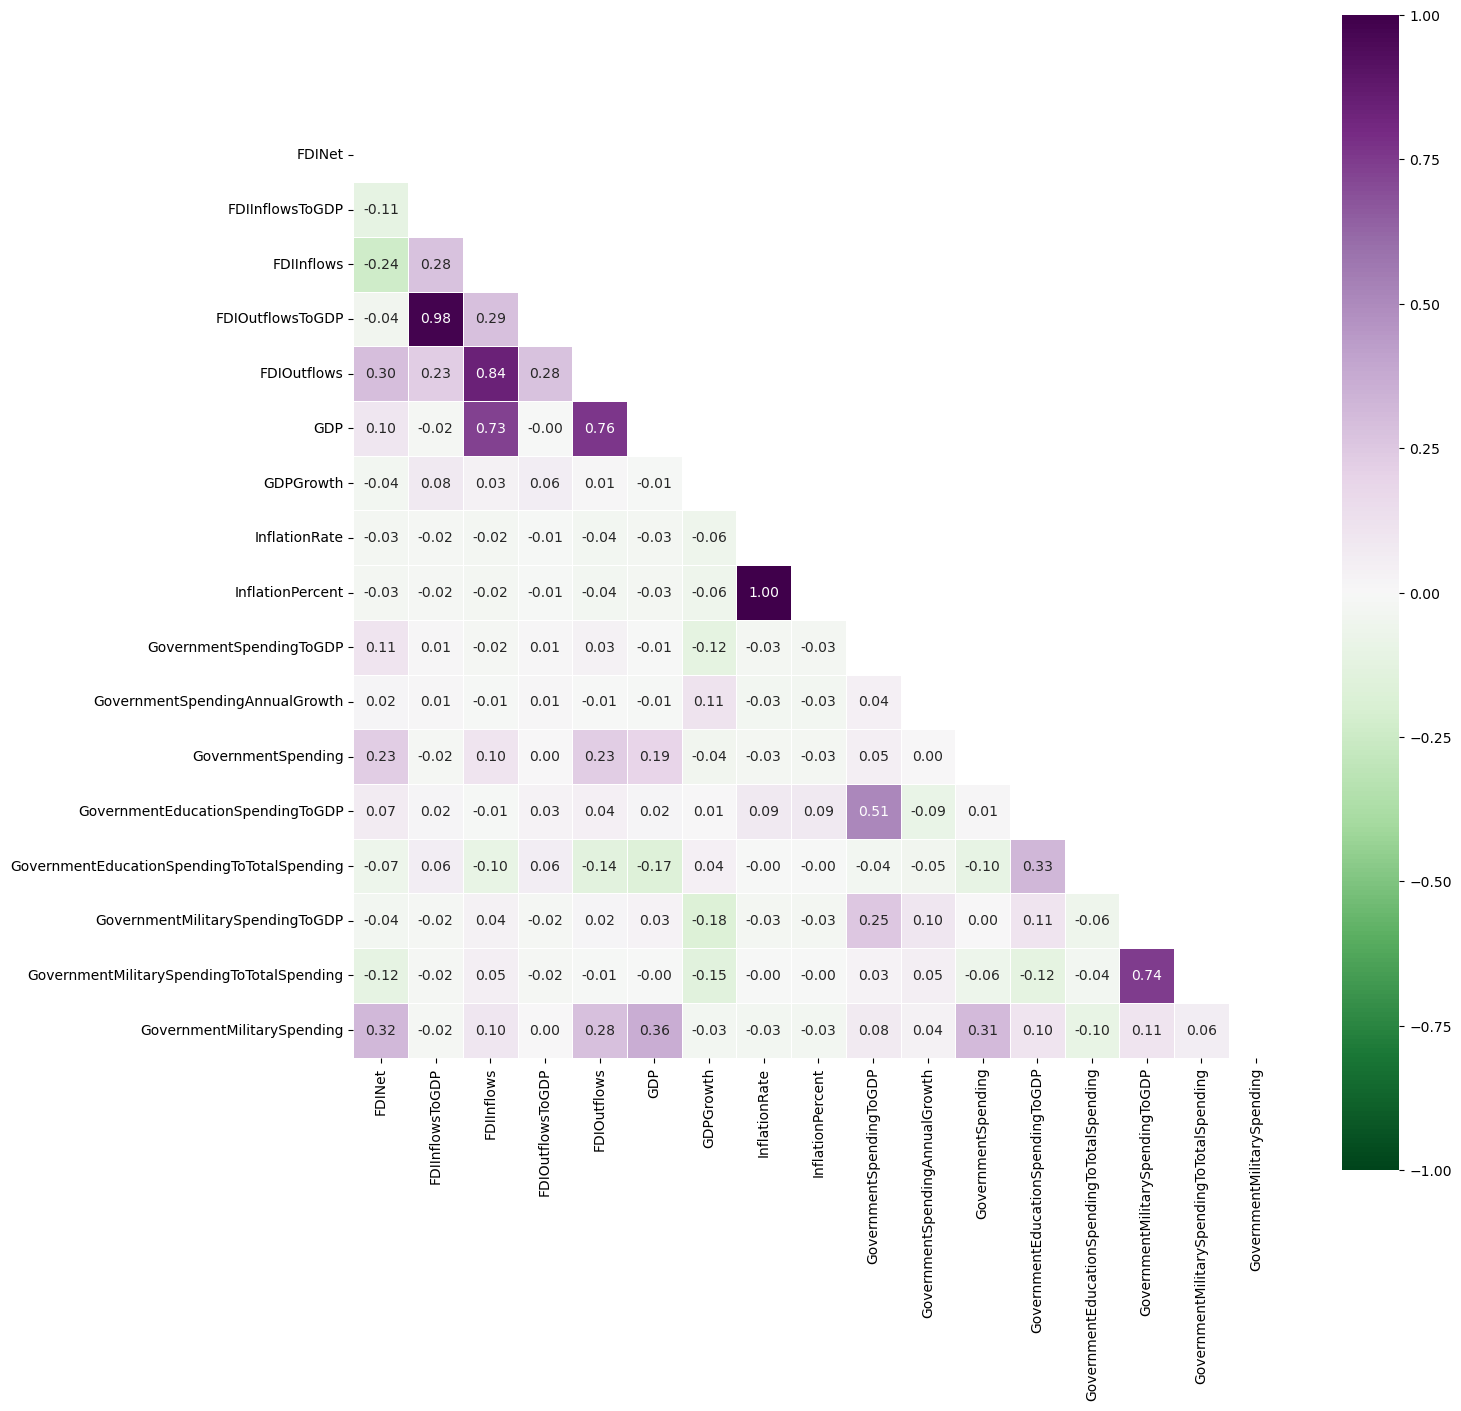

In [23]:
# create heatmap for numeric variables

num_df = df.drop(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel'], axis =1)
coco = num_df.corr()
tri_matrix = np.triu(coco)
plt.figure(figsize=(15, 15))
sns.heatmap(coco, square=True, linewidth=0.5, vmin=-1, vmax=1, cmap='PRGn_r', mask=tri_matrix, annot=True, fmt='.2f')
plt.show()

In [24]:
# drop the column with the highest correlation

df = df.drop(['InflationPercent'], axis =1)

***<font color="red">Is there any relationship between GDP and inflation rates in countries with different income levels?</font>***

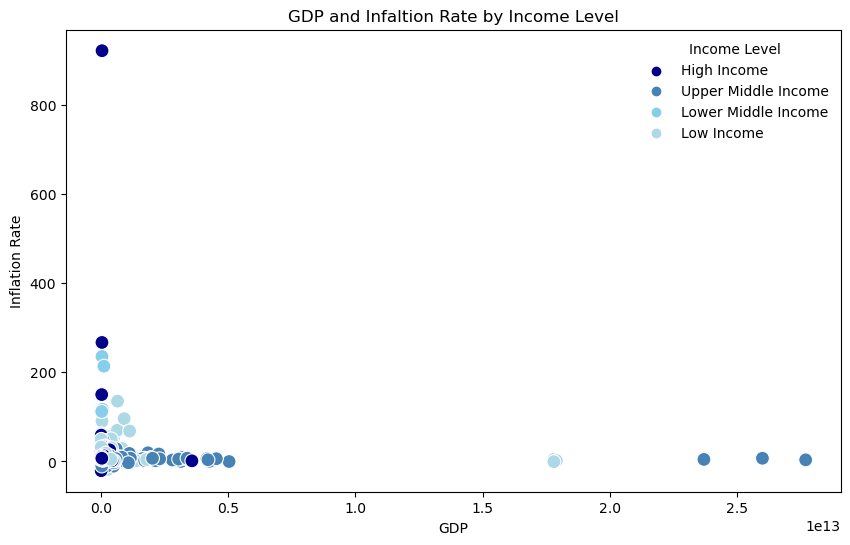

In [25]:
# scotterplot of GDP and inflation rate by income level

custom_palette = {
    'Upper Middle Income': '#ADD8E6',  
    'Low Income': '#87CEEB', 
    'High Income': '#4682B4',  
    'Lower Middle Income': '#00008B'  
}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GDP',
    y='InflationRate',
    hue='IncomeLevel',
    palette=custom_palette,
    s=100
)


handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
new_order = [0,1, 2, 3]  
plt.legend(
    [handles[i] for i in new_order],
    [new_labels[i] for i in new_order],
    title='Income Level',
    frameon=False
)

plt.title('GDP and Infaltion Rate by Income Level')
plt.xlabel('GDP')
plt.ylabel('Inflation Rate')
plt.show()


***<font color="red">Is there a relationship between income level and GDP growth?</font>***

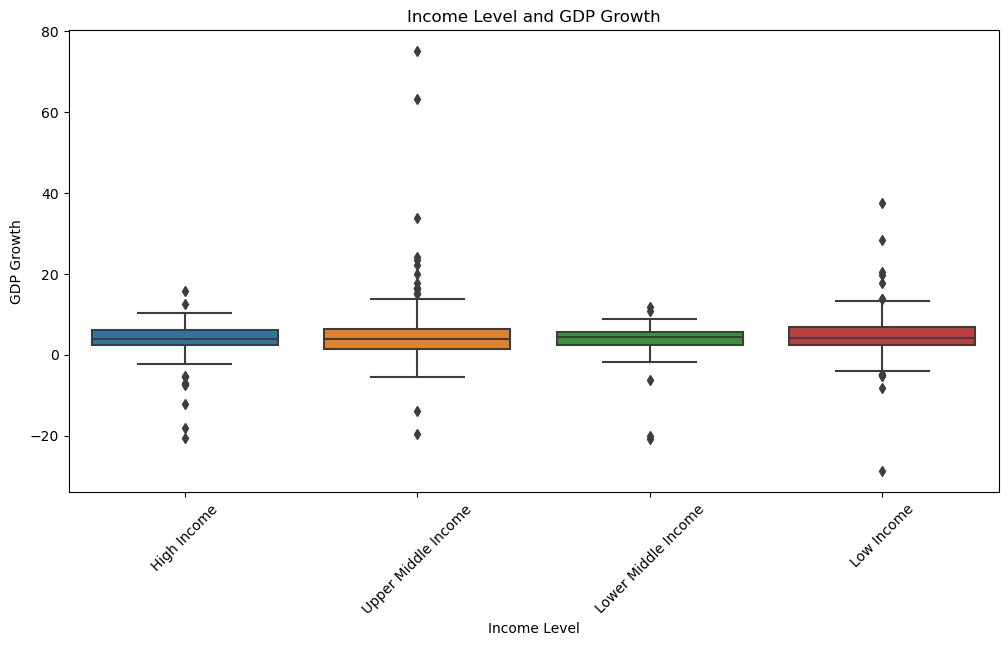

In [26]:
# income level vs GDP growth

new_labels = ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='IncomeLevel', y='GDPGrowth')
plt.title('Income Level and GDP Growth')
plt.xlabel('Income Level')
plt.ylabel('GDP Growth')  
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)
plt.show()


In [27]:
# drop rows with missing values in the IncomeLevel column

df= df.dropna(subset=['IncomeLevel'])

In [28]:
# define HighIncome column

df['HighIncome'] = df['IncomeLevel'].apply(lambda x: 1 if x in ['High Income'] else 0)

***<font color="red">What is the distribution of high-income countries compared to other countries?</font>***

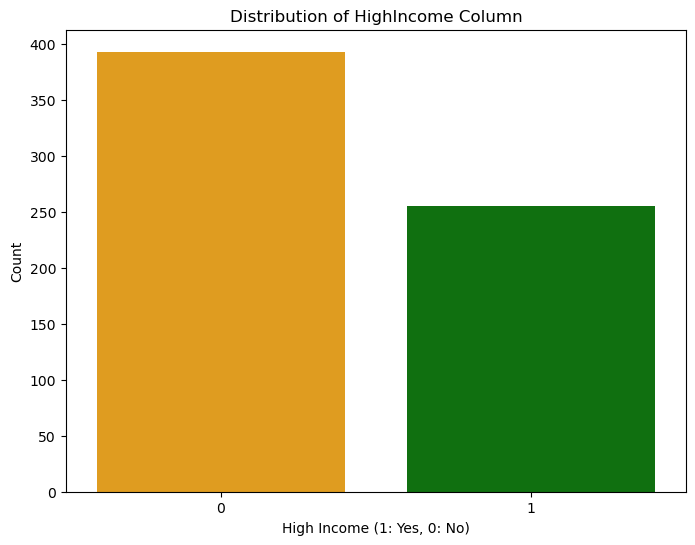

In [29]:
# visualize the distribution of HighIncome column

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HighIncome', palette={0: 'orange', 1: 'green'})
plt.title('Distribution of HighIncome Column')
plt.xlabel('High Income (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [30]:
# impute missing values in GDP, GDPGrowth, InflationRate, and InflationPercent columns using KNNImputer

columns_to_impute = ['GDP', 'GDPGrowth', 'InflationRate']
knn_imputer = KNNImputer(n_neighbors=5)
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])
print(df[columns_to_impute].isna().sum())

GDP              0
GDPGrowth        0
InflationRate    0
dtype: int64


In [31]:
# remove outliners in GDP, GDPGrowth, InflationRate, and InflationPercent columns

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = ['GDP', 'GDPGrowth', 'InflationRate']
df_cleaned = remove_outliers(df, columns_to_check)
print(df_cleaned[columns_to_check].describe())

                GDP   GDPGrowth  InflationRate
count  5.060000e+02  506.000000     506.000000
mean   1.378115e+11    4.286343       7.194557
std    1.934079e+11    2.798966       6.199670
min    5.906598e+07   -3.640426     -10.801423
25%    8.456790e+09    2.496388       3.070878
50%    3.181810e+10    4.392909       6.086926
75%    2.235000e+11    5.844407      11.165758
max    8.850000e+11   11.920637      26.993834


In [32]:
# see the shape

df.shape

(648, 22)

***<font color="red">How did inflation trends evolve from 2021 to 2023 for different regions? How did GDP growth trends evolve from 2021 to 2023 for different regions?</font>***

Dataset with only 3 points (2021, 2022, and 2023) is typically not sufficient for robust time series analysis but we can still visualize the trends and summarize and compare the inflation and GDP growth rates for these years across regions to identify any basic differences.

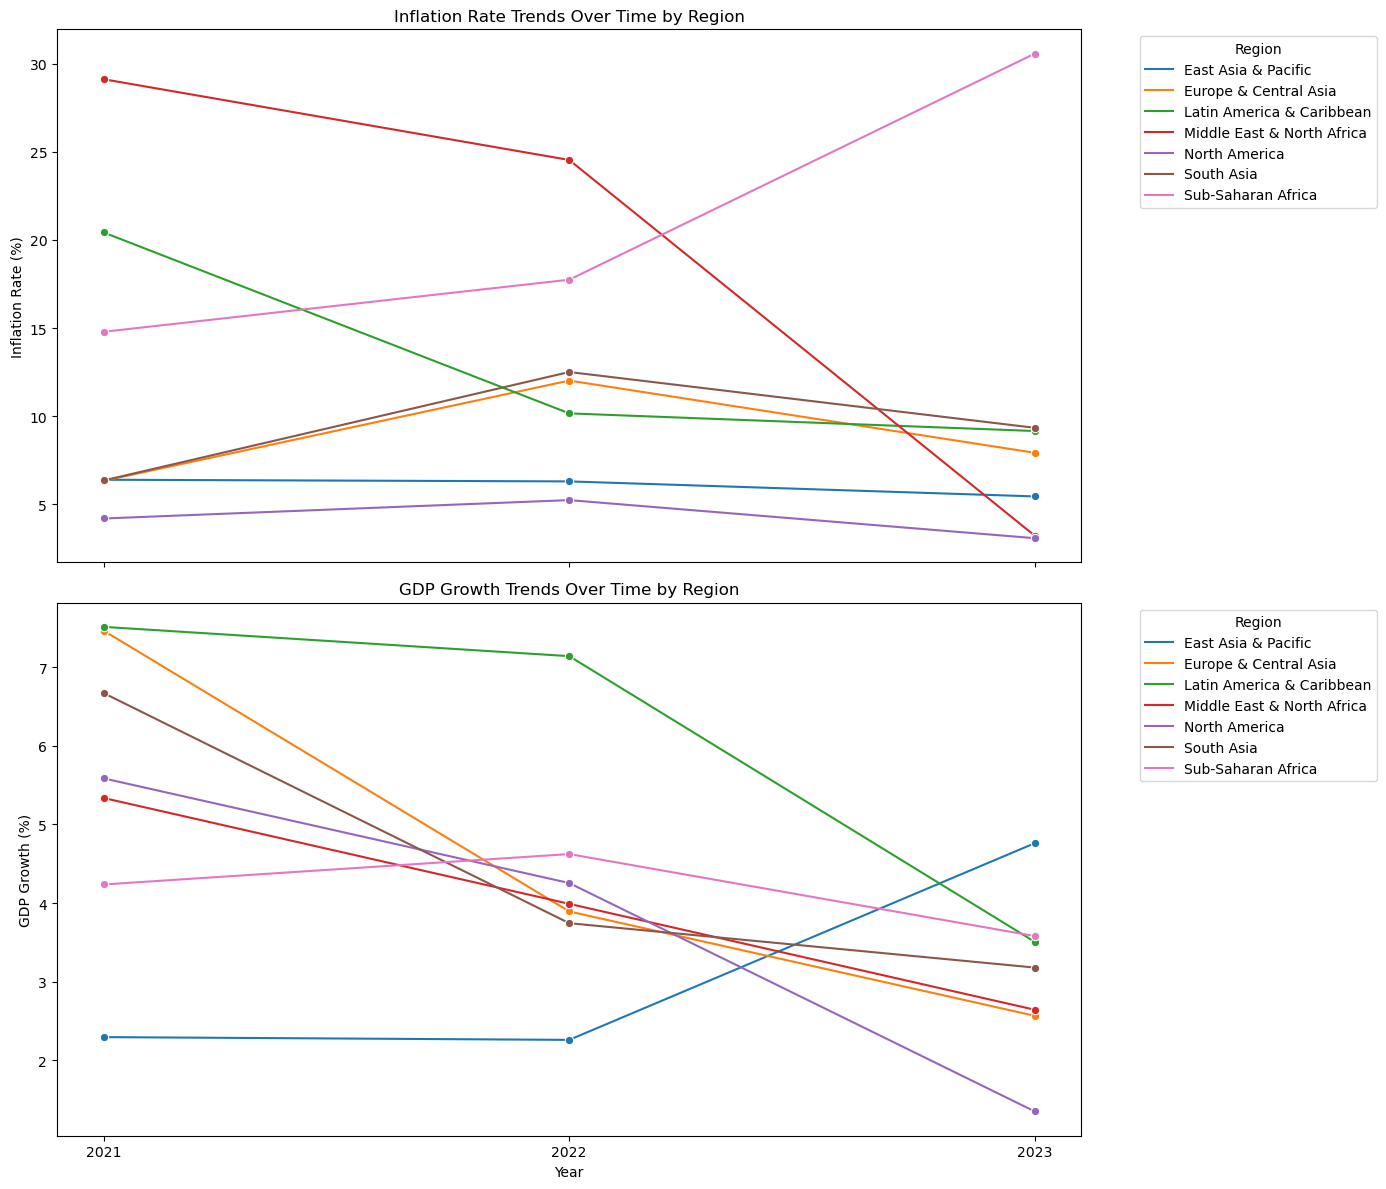

Inflation Rate Summary (by Year and Region):
Year                             2021       2022       2023
Region                                                     
East Asia & Pacific          6.395697   6.301478   5.450430
Europe & Central Asia        6.336273  12.021203   7.924762
Latin America & Caribbean   20.424540  10.160435   9.159248
Middle East & North Africa  29.115428  24.535585   3.216866
North America                4.197417   5.240509   3.079831
South Asia                   6.352862  12.506563   9.341533
Sub-Saharan Africa          14.788831  17.742052  30.570968

GDP Growth Summary (by Year and Region):
Year                            2021      2022      2023
Region                                                  
East Asia & Pacific         2.293815  2.258676  4.762268
Europe & Central Asia       7.466479  3.893256  2.564836
Latin America & Caribbean   7.514950  7.142164  3.505411
Middle East & North Africa  5.337268  3.989916  2.641878
North America               5.5

In [33]:
# inflation and GDP growth trends evolved over time for different regions

df_filtered = df[df['Year'].isin([2021, 2022, 2023])]
region_year_grouped = df_filtered.groupby(['Region', 'Year'])[['InflationRate', 'GDPGrowth']].mean().reset_index()
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

sns.lineplot(data=region_year_grouped, x='Year', y='InflationRate', hue='Region', marker='o', ax=axs[0])
axs[0].set_title('Inflation Rate Trends Over Time by Region')
axs[0].set_ylabel('Inflation Rate (%)')
axs[0].set_xticks([2021, 2022, 2023])  
axs[0].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(data=region_year_grouped, x='Year', y='GDPGrowth', hue='Region', marker='o', ax=axs[1])
axs[1].set_title('GDP Growth Trends Over Time by Region')
axs[1].set_ylabel('GDP Growth (%)')
axs[1].set_xlabel('Year')
axs[1].set_xticks([2021, 2022, 2023])  
axs[1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

inflation_pivot = region_year_grouped.pivot(index='Region', columns='Year', values='InflationRate')
gdp_pivot = region_year_grouped.pivot(index='Region', columns='Year', values='GDPGrowth')

print("Inflation Rate Summary (by Year and Region):")
print(inflation_pivot)

print("\nGDP Growth Summary (by Year and Region):")
print(gdp_pivot)


***<font color="red">Are GDP rates significantly different between high-income countries and others?</font>***

In [34]:
#GDP between high income countries and other countries

high_income_gdp = df[df['HighIncome'] == 1]['GDP']
other_income_gdp = df[df['HighIncome'] == 0]['GDP']

t_stat, p_value = ttest_ind(high_income_gdp, other_income_gdp, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between high income countries GDP and other countries GDP.")
else:
    print("There is no significant difference between high income countries GDP and other countries GDP.")

T-statistic: 2.4621041418001477
P-value: 0.014283066220862995
There is a significant difference between high income countries GDP and other countries GDP.


***<font color="red">Is there a significant difference in GDP growth rates between high-income countries and others?</font>***

In [35]:
#GDP growth rates between high income countries and other countries

high_income_gdp_growth = df[df['HighIncome'] == 1]['GDPGrowth']
other_income_gdp_growth = df[df['HighIncome'] == 0]['GDPGrowth']

t_stat, p_value = ttest_ind(high_income_gdp_growth, other_income_gdp_growth, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in GDP growth rates between high income countries and other countries.")
else:
    print("There is no significant difference in GDP growth rates between high income countries and other countries.")

T-statistic: 1.6888246149999246
P-value: 0.09201867982072977
There is no significant difference in GDP growth rates between high income countries and other countries.


***<font color="red">Does income level impact inflation?</font>***

Chi-square statistic: 13.568582760739623
P-value: 0.0035552735972439412
There is a significant relationship between income level and inflation rate.


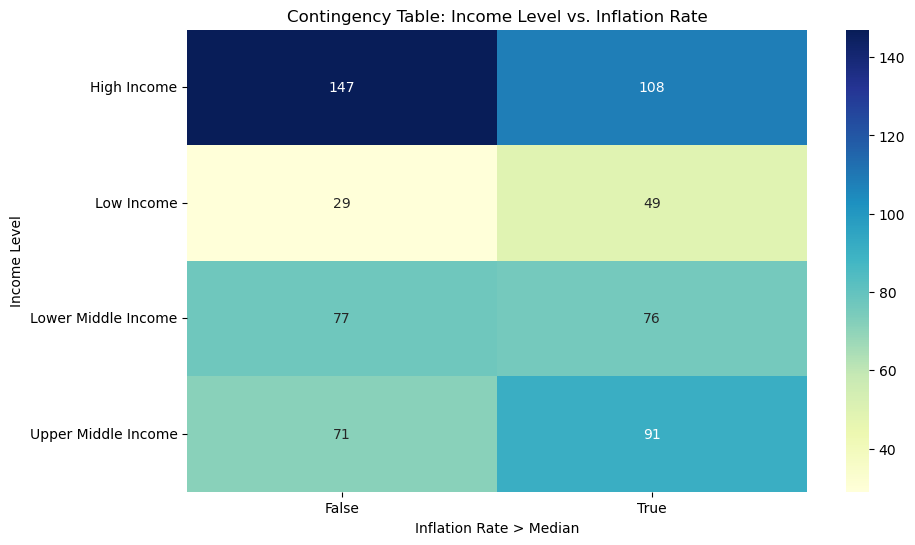

In [36]:
# income level vs inflation rate

contingency_table = pd.crosstab(df['IncomeLevel'], df['InflationRate'] > df['InflationRate'].median())
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between income level and inflation rate.")
else:
    print("There is no significant relationship between income level and inflation rate.")

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Income Level vs. Inflation Rate')
plt.xlabel('Inflation Rate > Median')
plt.ylabel('Income Level')
plt.show()

In [37]:
# drop columns to keep the proportion of missing data below 25% per column to maintain accuracy and reliability

df = df.drop(['GovernmentEducationSpendingToTotalSpending','GovernmentMilitarySpendingToTotalSpending'], axis =1)


In [38]:
# look for null values

df.isna().sum()

CountryID                             0
Year                                  0
CountryName                           0
Region                                0
IncomeLevel                           0
FDINet                              140
FDIInflowsToGDP                     108
FDIInflows                          100
FDIOutflowsToGDP                    148
FDIOutflows                         140
GDP                                   0
GDPGrowth                             0
InflationRate                         0
GovernmentSpendingToGDP             158
GovernmentSpendingAnnualGrowth      180
GovernmentSpending                  160
GovernmentEducationSpendingToGDP    282
GovernmentMilitarySpendingToGDP     203
GovernmentMilitarySpending          200
HighIncome                            0
dtype: int64

In [39]:
# drop raws to keep the proportion of missing data below 25% per column to maintain accuracy and reliability

df = df.dropna(subset=['GovernmentEducationSpendingToGDP'])

In [40]:
# see the shape

df.shape

(366, 20)

In [41]:
# look for null values

df.isna().sum()

CountryID                            0
Year                                 0
CountryName                          0
Region                               0
IncomeLevel                          0
FDINet                              37
FDIInflowsToGDP                     29
FDIInflows                          25
FDIOutflowsToGDP                    59
FDIOutflows                         55
GDP                                  0
GDPGrowth                            0
InflationRate                        0
GovernmentSpendingToGDP             66
GovernmentSpendingAnnualGrowth      76
GovernmentSpending                  67
GovernmentEducationSpendingToGDP     0
GovernmentMilitarySpendingToGDP     91
GovernmentMilitarySpending          91
HighIncome                           0
dtype: int64

In [42]:
# impute missing values using KNNImputer

columns_to_impute = ['FDINet','FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows',
       'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth','GovernmentSpending', 'GovernmentEducationSpendingToGDP',
       'GovernmentMilitarySpendingToGDP', 'GovernmentMilitarySpending']
knn_imputer = KNNImputer(n_neighbors=5)
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])
print(df[columns_to_impute].isna().sum())

FDINet                              0
FDIInflowsToGDP                     0
FDIInflows                          0
FDIOutflowsToGDP                    0
FDIOutflows                         0
GovernmentSpendingToGDP             0
GovernmentSpendingAnnualGrowth      0
GovernmentSpending                  0
GovernmentEducationSpendingToGDP    0
GovernmentMilitarySpendingToGDP     0
GovernmentMilitarySpending          0
dtype: int64


In [ ]:
# remove outliers 

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = ['FDINet','FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows',
       'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth','GovernmentSpending', 'GovernmentEducationSpendingToGDP',
       'GovernmentMilitarySpendingToGDP', 'GovernmentMilitarySpending']
df_cleaned = remove_outliers(df, columns_to_check)
print(df_cleaned[columns_to_check].describe())

             FDINet  FDIInflowsToGDP    FDIInflows  FDIOutflowsToGDP  \
count  1.010000e+02       101.000000  1.010000e+02        101.000000   
mean  -4.545674e+08         2.690326  4.757981e+08          0.140326   
std    8.024206e+08         3.114098  7.625705e+08          0.256550   
min   -4.098800e+09        -4.269913 -3.202095e+08         -0.509875   
25%   -6.718362e+08         0.532450  1.766440e+07         -0.000472   
50%   -2.078599e+08         1.875953  1.740222e+08          0.104295   
75%   -2.600832e+07         4.038595  6.485672e+08          0.300492   
max    2.426798e+09        11.554065  4.050000e+09          0.827336   

        FDIOutflows  GovernmentSpendingToGDP  GovernmentSpendingAnnualGrowth  \
count  1.010000e+02               101.000000                      101.000000   
mean   1.504056e+07                13.994145                        1.763018   
std    3.969083e+07                 7.102363                        3.107641   
min   -9.216967e+07            

***<font color="red">Is there a significant relationship between GDP and government education spending?</font>***

Coefficient: 0.03765773393590862
Intercept: 4.281020340325137
R-squared: 0.0004258497056182087


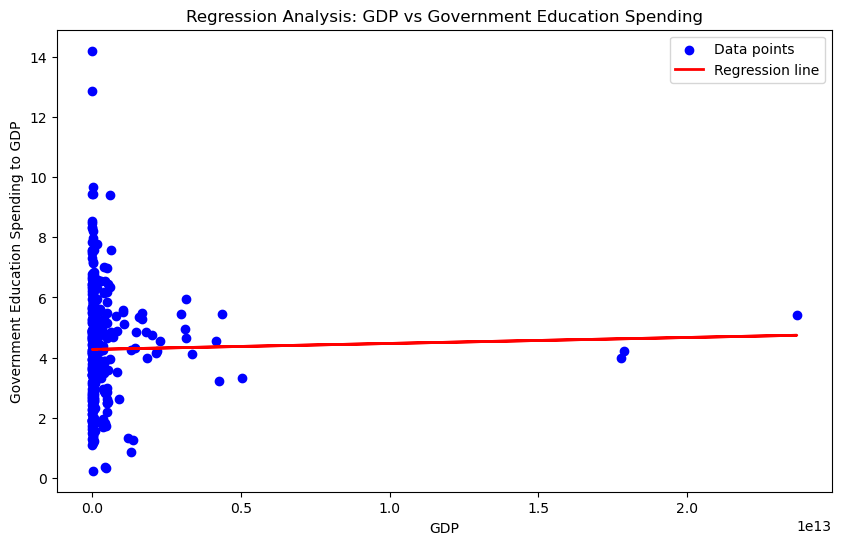

In [44]:
# examine the relationship between GDP and government education spending using linear regression

X = df[['GDP']]
y = df['GovernmentEducationSpendingToGDP']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

regression_model = LinearRegression()
regression_model.fit(X_scaled, y)

y_pred = regression_model.predict(X_scaled)
r2 = r2_score(y, y_pred)

print(f"Coefficient: {regression_model.coef_[0]}")
print(f"Intercept: {regression_model.intercept_}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('GDP')
plt.ylabel('Government Education Spending to GDP')
plt.title('Regression Analysis: GDP vs Government Education Spending')
plt.legend()
plt.show()

***<font color="red">Is there a significant relationship between the proportion of government education spending and GDP growth?</font>***

Coefficient: 0.035006531991834094
Intercept: 5.056224671132276
R-squared: 4.75864677352833e-05


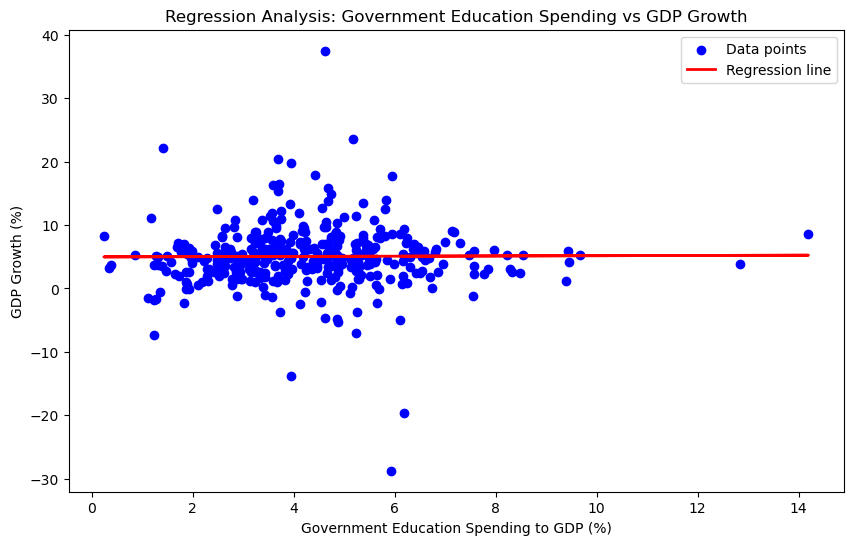

In [45]:
# examine the relationship between government education spending and GDP growth using linear regression

X = df[['GovernmentEducationSpendingToGDP']]
y = df['GDPGrowth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

regression_model = LinearRegression()
regression_model.fit(X_scaled, y)

y_pred = regression_model.predict(X_scaled)
r2 = r2_score(y, y_pred)

print(f"Coefficient: {regression_model.coef_[0]}")
print(f"Intercept: {regression_model.intercept_}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Government Education Spending to GDP (%)')
plt.ylabel('GDP Growth (%)')
plt.title('Regression Analysis: Government Education Spending vs GDP Growth')
plt.legend()
plt.show()

***<font color="red">Is it possible to determine if foreign investment, government spending, and inflation collectively impact GDP using the available data?</font>***

Mean Squared Error: 3.341651201622489e+24
R-squared: 0.0740675957744259
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     9.652
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.82e-06
Time:                        15:50:33   Log-Likelihood:                -10853.
No. Observations:                 366   AIC:                         2.171e+04
Df Residuals:                     362   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

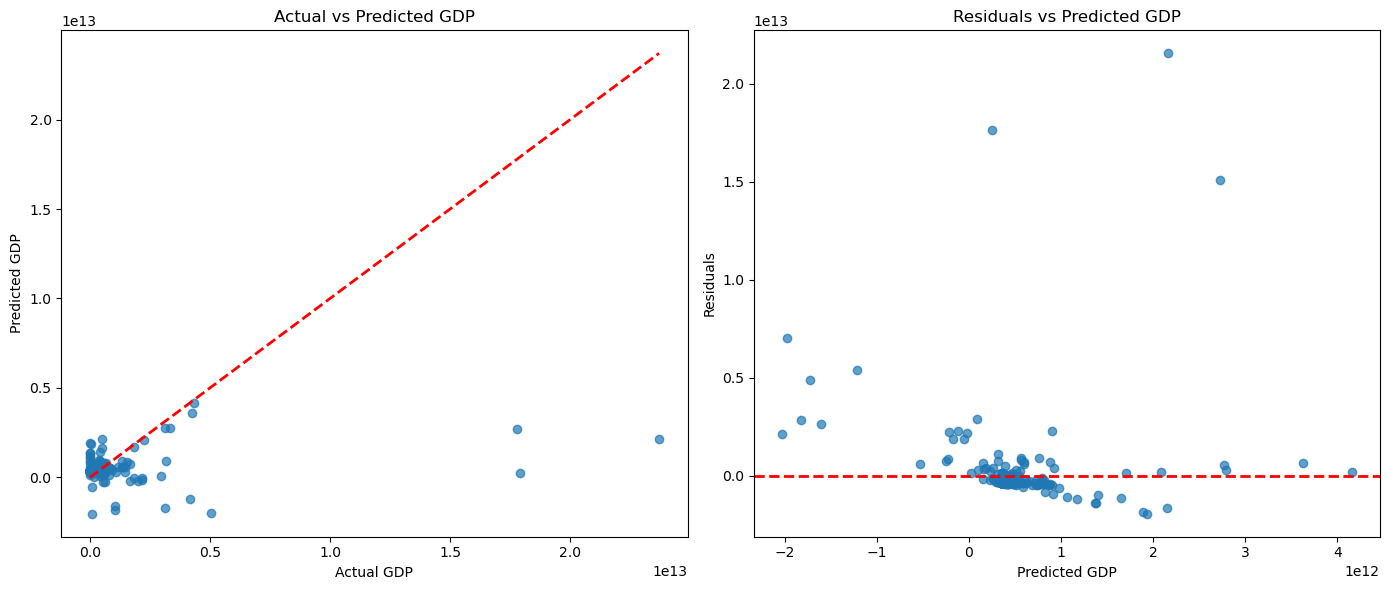

Interpretations:
The R-squared value of 0.07 indicates that approximately 7.41% of the variance in GDP is explained by the model.
The coefficients of the model indicate the impact of each feature on GDP:
FDINet: -381402707308.18
GovernmentSpending: 471198526575.08
InflationRate: -23691580522.55


In [46]:
# impact of foreign direct investment, government spending, and inflation rate on GDP

features = ['FDINet', 'GovernmentSpending', 'InflationRate']
target = 'GDP'

scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target]

mlr = LinearRegression()
mlr.fit(X, y)

y_pred = mlr.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print(results.summary())

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted GDP')
plt.tight_layout()
plt.show()

print("Interpretations:")
print(f"The R-squared value of {r2:.2f} indicates that approximately {r2*100:.2f}% of the variance in GDP is explained by the model.")
print("The coefficients of the model indicate the impact of each feature on GDP:")
for feature, coef in zip(features, mlr.coef_):
    print(f"{feature}: {coef:.2f}")

***<font color="red">Are there distinct clusters of countries based on available economic indicators?</font>***

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

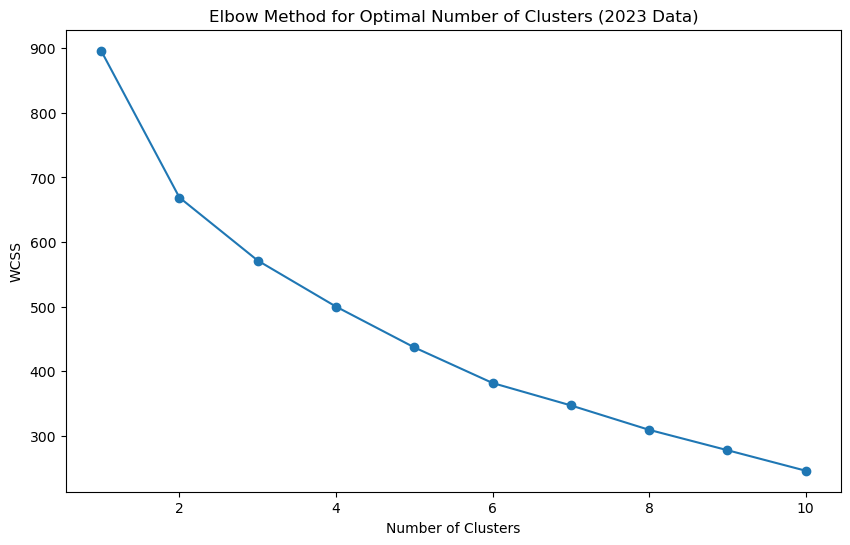

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\idaba\AppData\Local\Temp\ipykernel_19324\655079923.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\idaba\AppData\Local\Temp\ipykernel_19324\655079923.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\idab

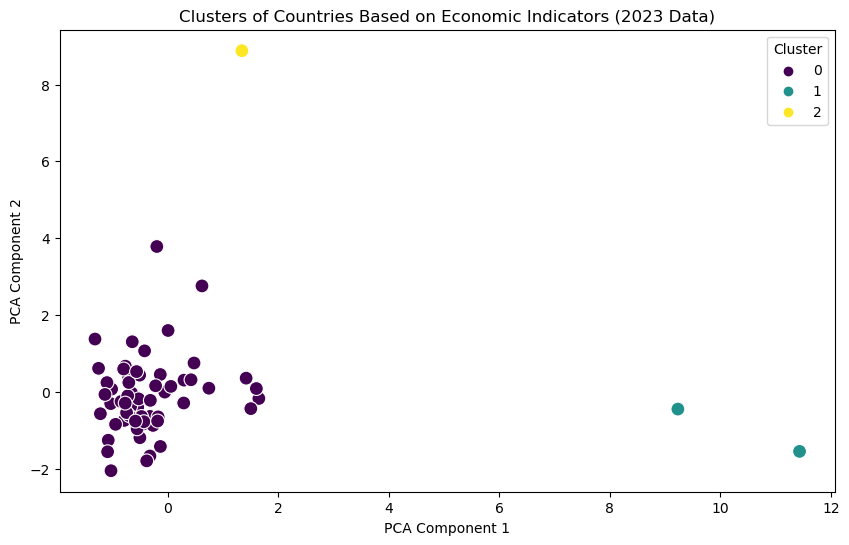

Cluster 0: ['Morocco', 'Andorra', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Bermuda', 'Barbados', 'Bhutan', 'C?te d?Ivoire', 'Dominica', 'Algeria', 'Ecuador', 'Fiji', 'Georgia', 'Gambia, The', 'Guatemala', 'Honduras', 'Indonesia', 'Iran, Islamic Rep.', 'Jamaica', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kuwait', 'Lao PDR', 'Sri Lanka', 'Lesotho', 'Moldova', 'Maldives', 'Mongolia', 'Mauritania', 'Mauritius', 'Malaysia', 'Namibia', 'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Palau', 'Paraguay', 'Rwanda', 'Solomon Islands', 'Sierra Leone', 'El Salvador', 'Suriname', 'Eswatini', 'Turks and Caicos Islands', 'Thailand', 'Tajikistan', 'Turkmenistan', 'Tonga', 'Tunisia', 'Tuvalu', 'Tanzania', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Samoa', 'South Africa']
Cluster 1: ['Hong Kong SAR, China', 'Singapore']
Cluster 2: ['Saudi Arabia']
Interpretation:
The K-Means clustering algorithm identified 3 distinct clusters of countries based on the selected economic indicators for the year 2

In [47]:
# cluster counties based on economic indicators

df_2023 = df[df['Year'] == 2023]

features = ['FDINet', 'FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows',
            'GDP', 'GDPGrowth', 'InflationRate',
            'GovernmentSpendingToGDP', 'GovernmentSpendingAnnualGrowth',
            'GovernmentSpending', 'GovernmentEducationSpendingToGDP',
            'GovernmentMilitarySpendingToGDP', 'GovernmentMilitarySpending']


X = scaler.fit_transform(df_2023[features])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (2023 Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_2023['Cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_2023['PCA1'] = principal_components[:, 0]
df_2023['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2023, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Countries Based on Economic Indicators (2023 Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

for cluster in range(optimal_clusters):
    countries_in_cluster = df_2023[df_2023['Cluster'] == cluster]['CountryName'].tolist()
    print(f"Cluster {cluster}: {countries_in_cluster}")

print("Interpretation:")
print(f"The K-Means clustering algorithm identified {optimal_clusters} distinct clusters of countries based on the selected economic indicators for the year 2023.")
print("The scatter plot shows the distribution of countries in the reduced PCA space, colored by their assigned cluster.")

In [48]:
# get column names

df.columns

Index(['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel', 'FDINet',
       'FDIInflowsToGDP', 'FDIInflows', 'FDIOutflowsToGDP', 'FDIOutflows',
       'GDP', 'GDPGrowth', 'InflationRate', 'GovernmentSpendingToGDP',
       'GovernmentSpendingAnnualGrowth', 'GovernmentSpending',
       'GovernmentEducationSpendingToGDP', 'GovernmentMilitarySpendingToGDP',
       'GovernmentMilitarySpending', 'HighIncome'],
      dtype='object')

***<font color="red">How effective are logistic regression, decision tree, random forest, and XGBoost models in predicting high-income countries based on GDP, GDP growth, foreign investment, inflation rate, and government spending data?</font>***

In [49]:
# define new data frame

data = df.drop(columns=['CountryID', 'Year', 'CountryName', 'Region', 'IncomeLevel'])

In [50]:
# see the head

data.head()

,FDINet,FDIInflowsToGDP,FDIInflows,FDIOutflowsToGDP,FDIOutflows,GDP,GDPGrowth,InflationRate,GovernmentSpendingToGDP,GovernmentSpendingAnnualGrowth,GovernmentSpending,GovernmentEducationSpendingToGDP,GovernmentMilitarySpendingToGDP,GovernmentMilitarySpending,HighIncome
0,-1.621385e+09,1.594223,2.264149e+09,0.452580,6.427632e+08,1.420000e+11,8.154739,2.415204,18.973838,7.196424,2.694736e+09,5.642735,3.755157,5.378367e+09,0
3,3.297746e+09,-6.548542,-4.355117e+09,-1.589908,-1.057371e+09,6.650513e+10,1.199211,38.823722,7.683455,-1.739585,5.198915e+08,2.297189,1.399993,9.814511e+07,0
4,-1.168645e+09,6.757907,1.218586e+09,0.276961,4.994157e+07,1.803201e+10,8.969553,3.444399,12.835224,1.438823,2.314449e+08,3.225599,1.242989,2.228145e+07,0
5,-3.452689e+08,0.184985,1.239827e+07,-0.022245,8.678557e+09,3.324648e+09,8.286779,2.558861,10.014510,0.547919,1.270001e+09,2.583972,1.890650,8.699585e+07,1
6,-8.679400e+08,5.430419,2.254595e+10,5.430419,2.254595e+10,4.150000e+11,4.354755,13.843770,14.618935,11.772315,6.661331e+09,3.894394,2.054336,8.956485e+08,1


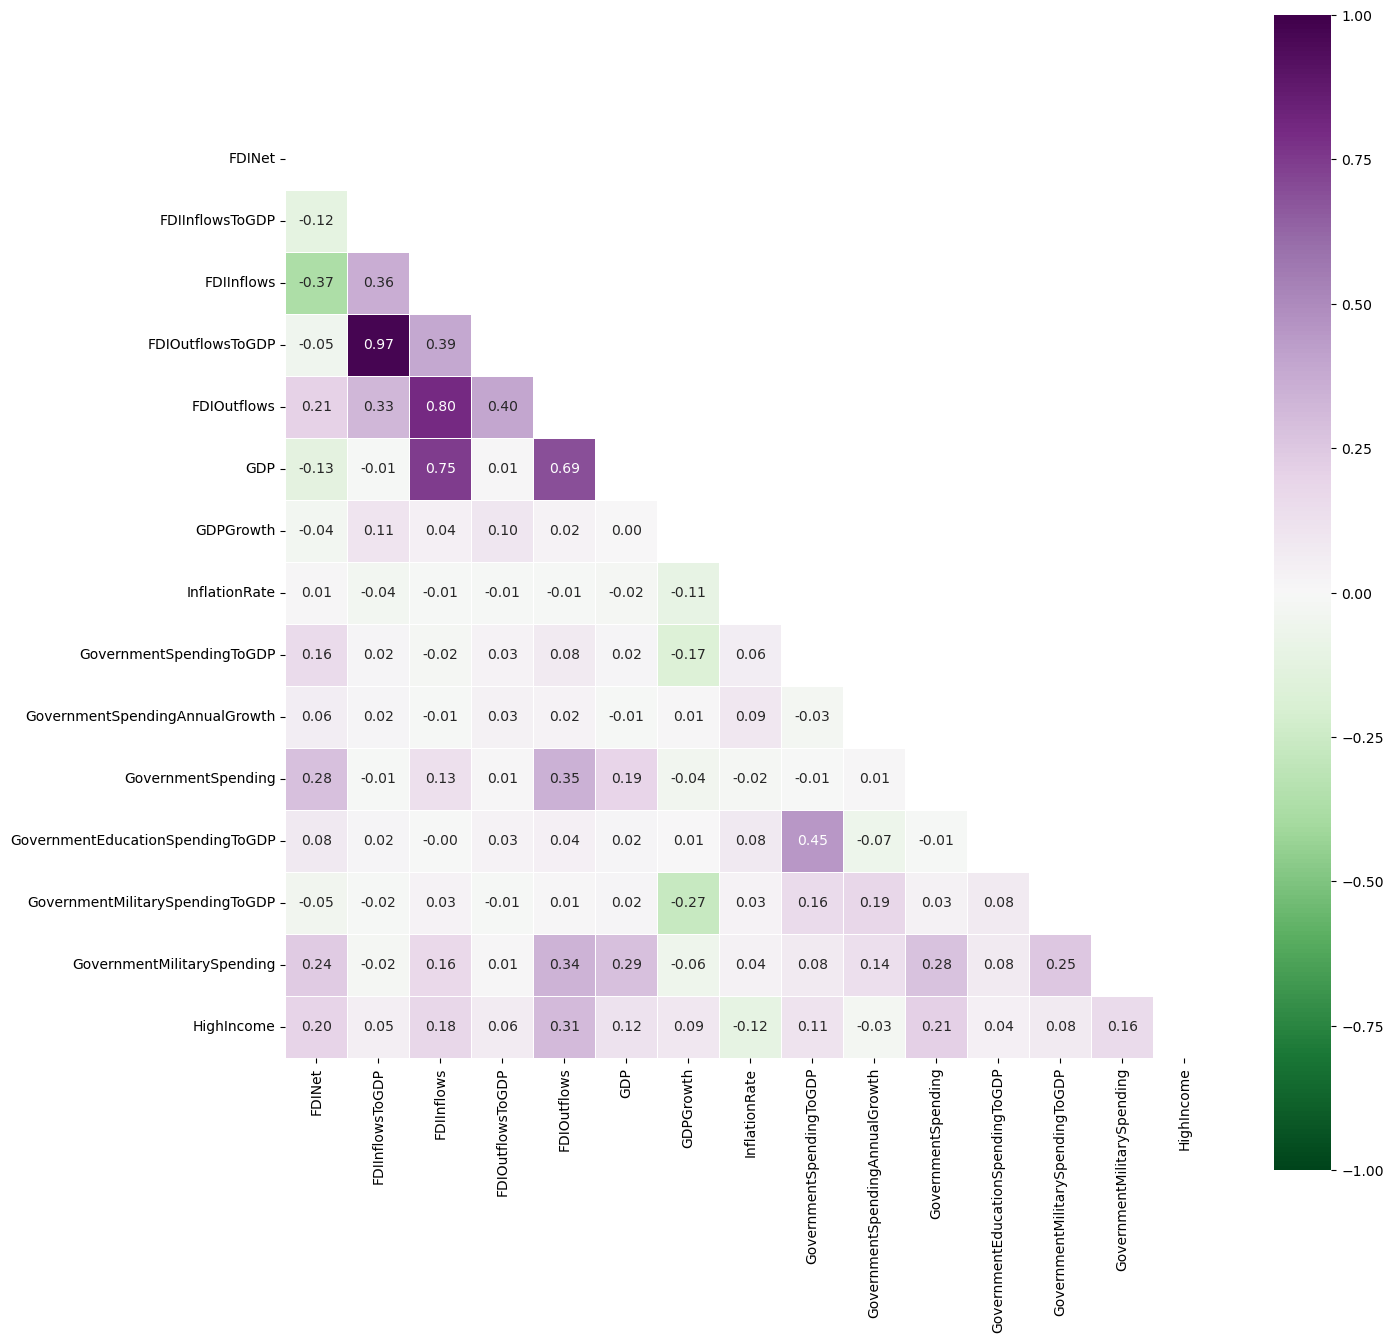

In [51]:
# inspect the data using visualization

coco = data.corr()
tri_matrix = np.triu(coco)
plt.figure(figsize=(15, 15))
sns.heatmap(coco, square=True, linewidth=0.5, vmin=-1, vmax=1, cmap='PRGn_r', mask=tri_matrix, annot=True, fmt='.2f')
plt.show()

In [52]:
# set target variable and split the data to two part (80% train set -20% test set)

X = data.drop(['HighIncome'], axis=1)
y = df['HighIncome']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [53]:
# use StandardScaler to standardize the numerical features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Cross-Validation Accuracy Scores: [0.7972973  0.75342466 0.75342466 0.76712329 0.80821918]
Average Cross-Validation Accuracy: 0.78


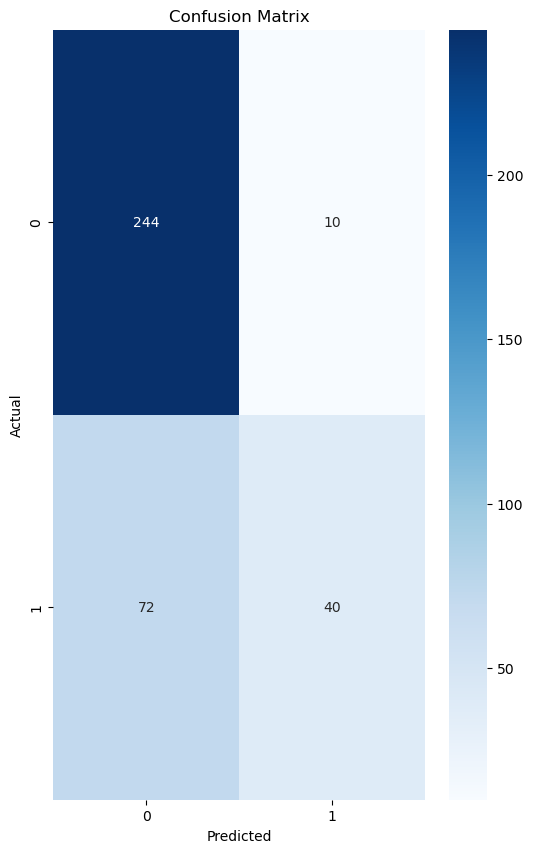

In [54]:
# create logestic regression model using kf

log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(log_reg, X_scaled, y, cv=kf, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')

y_pred = cross_val_predict(log_reg, X_scaled, y, cv=kf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

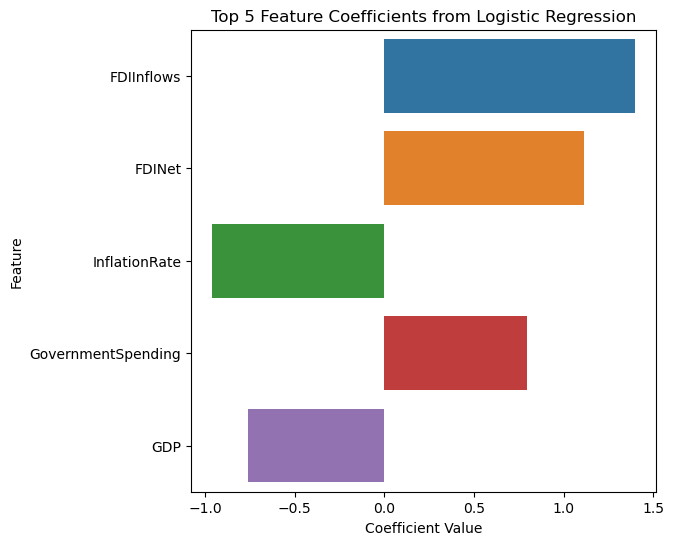

In [55]:
# plot top most impactful features from logestic regression

coefficients = log_reg.coef_[0]
coefficients_df = pd.DataFrame({'Feature':X.columns,'Coefficient':coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)
top_features_df = coefficients_df.head(5)
plt.figure(figsize=(6, 6))
sns.barplot (x='Coefficient', y='Feature', data=top_features_df)
plt.title('Top 5 Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.6909090909090909
Confusion Matrix:
[[53 19]
 [15 23]]


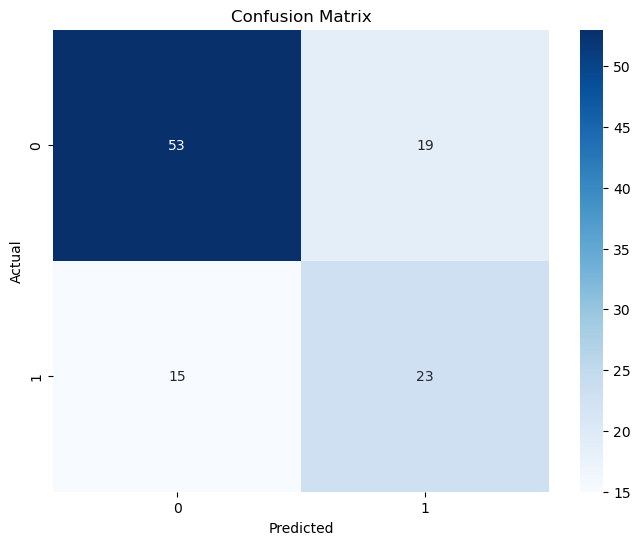

In [56]:
# create decision tree model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


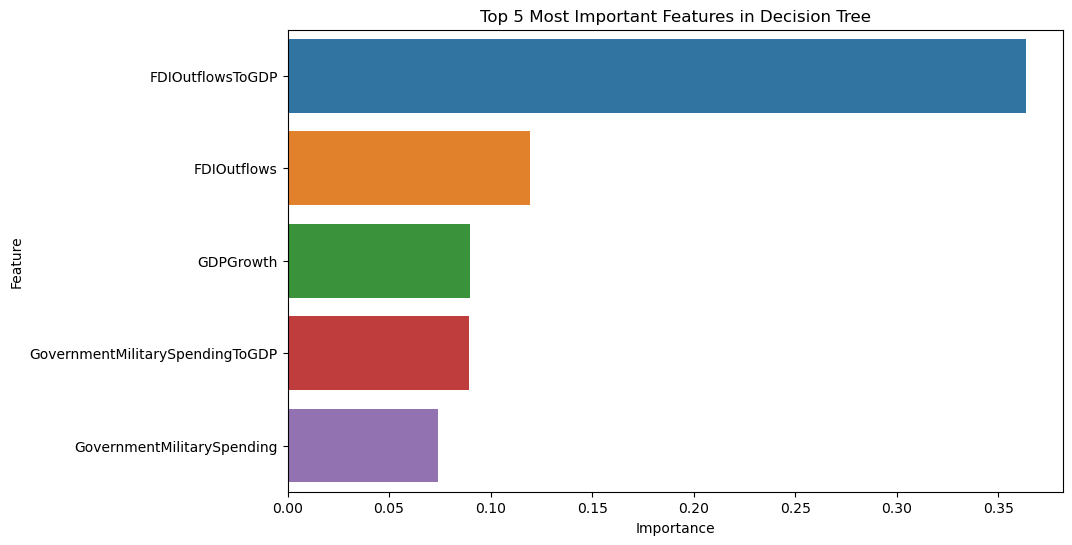

In [57]:
# plot top most impactful features from the decision tree model

importances = decision_tree.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features_df = importance_df.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title('Top 5 Most Important Features in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Random Forest Train Accuracy:  1.0
Random Forest Test Accuracy:  0.8363636363636363


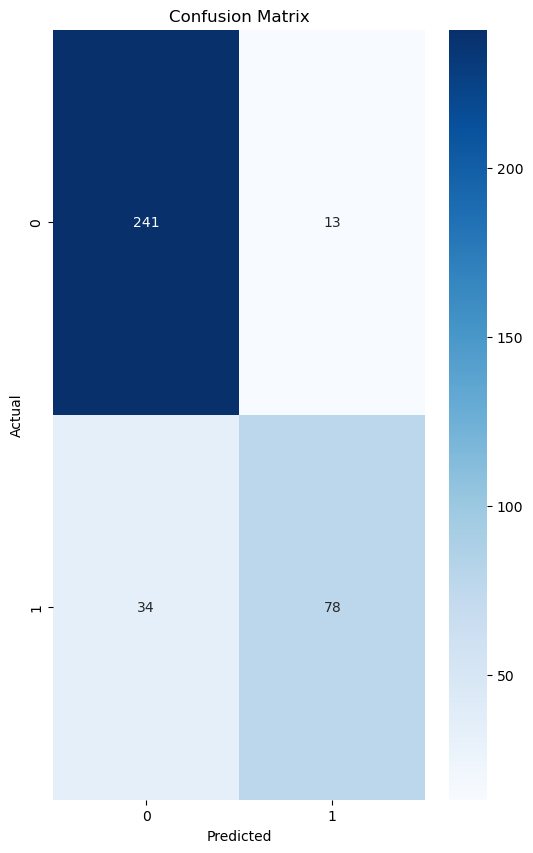

In [58]:
# create random forest model

random_forest = RandomForestClassifier (random_state=42, n_jobs=-1) 
random_forest.fit(X_train, y_train)
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)
accuracy_train_rf = accuracy_score (y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score (y_test, y_pred_test_rf)
print('Random Forest Train Accuracy: ', accuracy_train_rf)
print('Random Forest Test Accuracy: ', accuracy_test_rf)

y_pred = cross_val_predict(random_forest, X, y, cv=kf)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

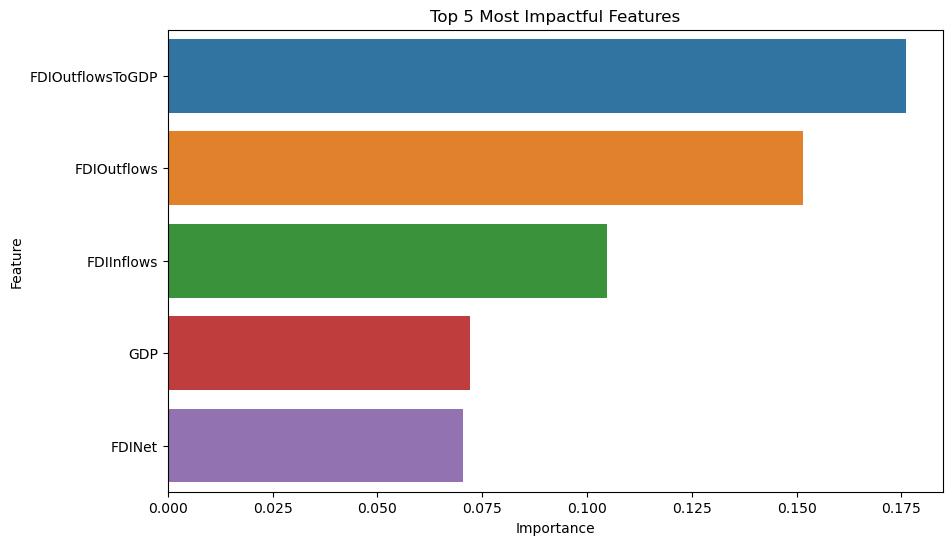

In [59]:
# plot random forest top ten features

importances = random_forest.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5))
plt.title('Top 5 Most Impactful Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

XGBoost Test Accuracy: 0.8454545454545455
Confusion Matrix:
[[68  4]
 [13 25]]


c:\Users\idaba\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[15:50:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




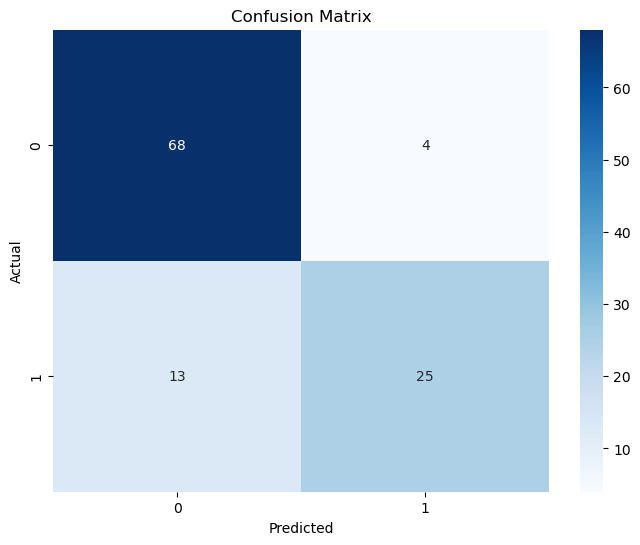

In [60]:
# create xg boost model

xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_test_xgb = xgb_model.predict(X_test)

accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)

print(f"XGBoost Test Accuracy: {accuracy_test_xgb}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

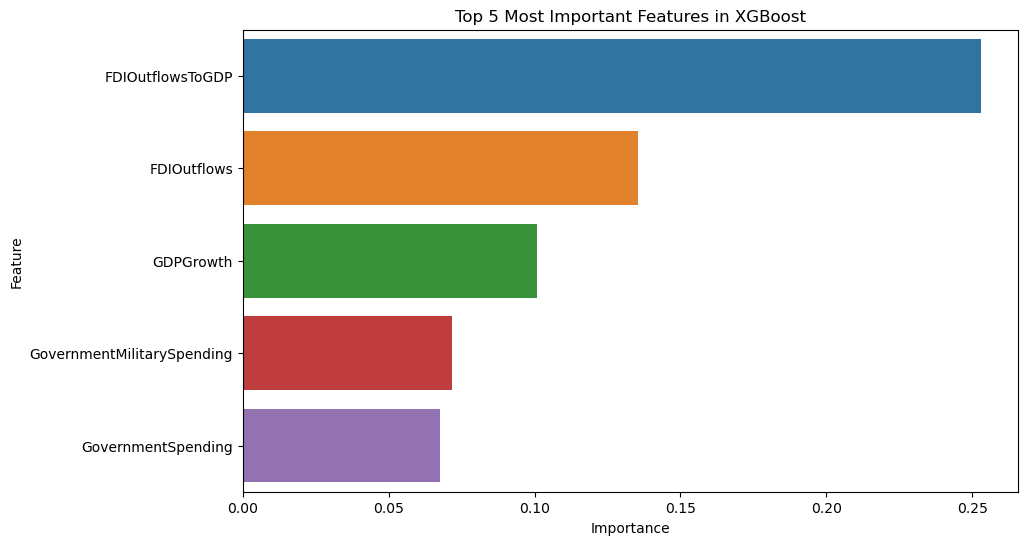

In [61]:
# plot xg boost top ten features

importances = xgb_model.feature_importances_
feature_names = X.columns[:len(importances)]  # Ensure the lengths match
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features_df = importance_df.head(5)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title('Top 5 Most Important Features in XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

***<font color="red">Is a neural network model more effective than traditional regression models at identifying the most significant economic indicators for high-income nations? What economic indicators predict high-income countries?</font>***

Epoch 1/100


c:\Users\idaba\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4373 - loss: 0.7544 - val_accuracy: 0.5254 - val_loss: 0.6858
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5306 - loss: 0.6976 - val_accuracy: 0.6441 - val_loss: 0.6533
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6059 - loss: 0.6894 - val_accuracy: 0.7458 - val_loss: 0.6253
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6766 - loss: 0.6658 - val_accuracy: 0.7797 - val_loss: 0.5983
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7280 - loss: 0.6175 - val_accuracy: 0.7966 - val_loss: 0.5773
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.6511 - val_accuracy: 0.7966 - val_loss: 0.5617
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6365 - loss: 0.6269 - val_accuracy: 0.7966 - val_loss: 0.5459
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.6318 - val_accuracy: 0.7966 - val_loss: 0.5319
Epoch 9/100

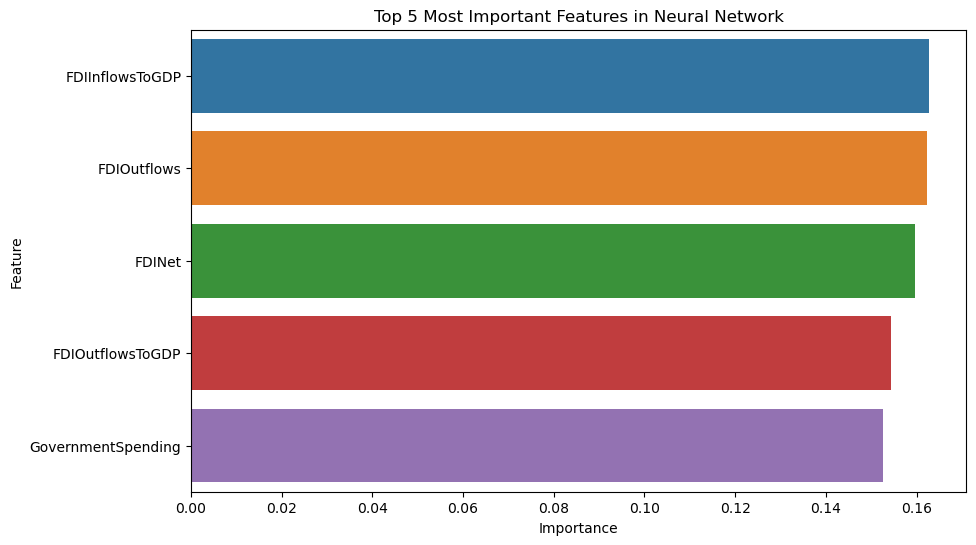

In [62]:
# create neural network model

X = data.drop(['HighIncome'], axis=1) 
y = df['HighIncome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

importances = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_features_df = importance_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features_df)
plt.title('Top 5 Most Important Features in Neural Network')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

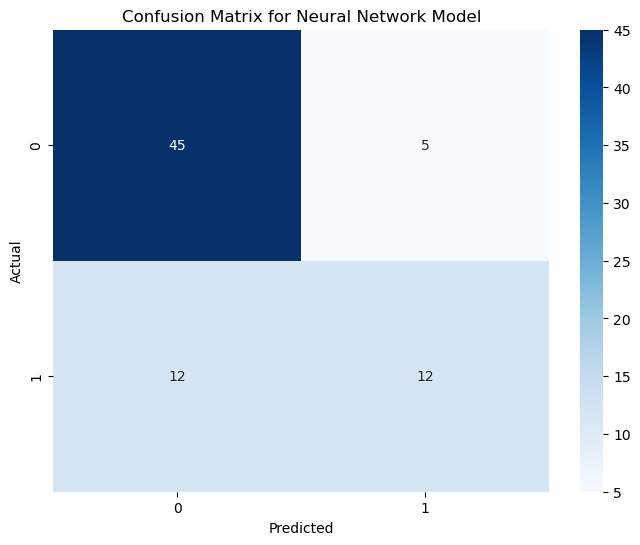

In [63]:
# confusion matrix for neural network model

conf_matrix_nn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



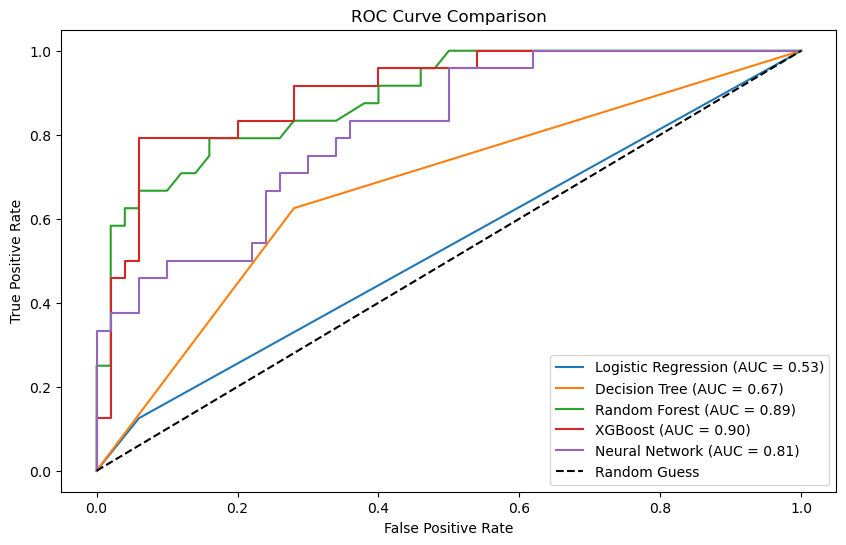

In [ ]:
# compare the models using ROC curve

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob)
auc_nn = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\Users\idaba\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



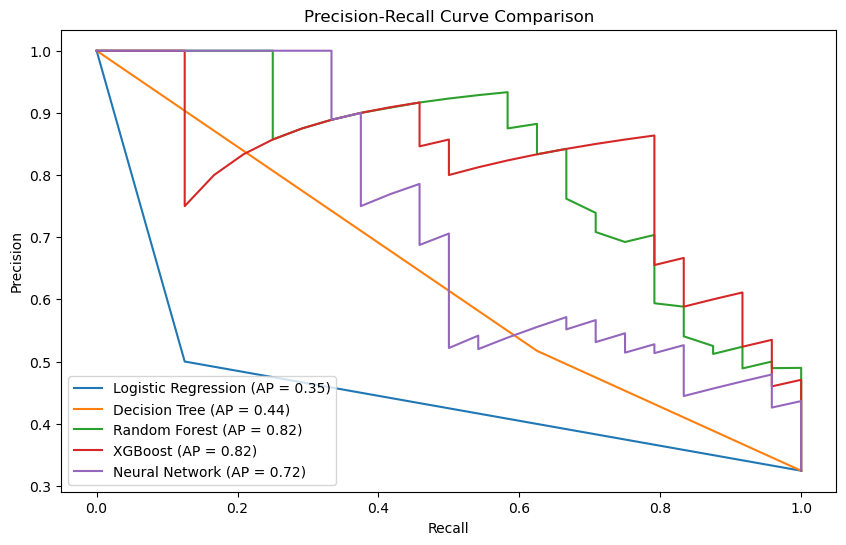

In [65]:
# comare the models using precision-recall curve

precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
average_precision_log_reg = average_precision_score(y_test, log_reg.predict_proba(X_test)[:, 1])

precision_dt, recall_dt, _ = precision_recall_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
average_precision_dt = average_precision_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

precision_rf, recall_rf, _ = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
average_precision_rf = average_precision_score(y_test, random_forest.predict_proba(X_test)[:, 1])

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
average_precision_xgb = average_precision_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision_nn = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall_log_reg, precision_log_reg, label=f'Logistic Regression (AP = {average_precision_log_reg:.2f})')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (AP = {average_precision_dt:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {average_precision_rf:.2f})')
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {average_precision_xgb:.2f})')
plt.plot(recall_nn, precision_nn, label=f'Neural Network (AP = {average_precision_nn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')
plt.show()

In [ ]:
# Create a comparison table for the models

comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'],
    'AUC': [auc_log_reg, auc_dt, auc_rf, auc_xgb, auc_nn],
    'Average Precision': [average_precision_log_reg, average_precision_dt, average_precision_rf, average_precision_xgb, average_precision_nn]
})

comparison_table = comparison_table.round(3)

print(tabulate(comparison_table, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+-------+-------------------+
|        Model        |  AUC  | Average Precision |
+---------------------+-------+-------------------+
| Logistic Regression | 0.532 |       0.346       |
|    Decision Tree    | 0.672 |       0.445       |
|    Random Forest    | 0.889 |       0.824       |
|       XGBoost       | 0.903 |       0.817       |
|   Neural Network    | 0.81  |       0.724       |
+---------------------+-------+-------------------+
